<a href="https://colab.research.google.com/github/Indriana-create/Aplikasi-login/blob/main/K_means_for_Water_Treatment_Classification_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Library**

In [ ]:
import csv
import numpy as np
import pandas as pd

# **Load Data**

In [ ]:
# Mengatur max row dan column display agar dapat menampilkan max 1000 baris dan kolom
pd.set_option('display.max_row', 1000)
pd.set_option('display.max_column', 1000)

In [ ]:
# Membuka file water-treatment.names untuk melihat informasi dalam file
waterTreatment_name = "water-treatment.names"

with open(waterTreatment_name, "r") as file:
    reader = csv.reader(file) # Dengan menggunakan csv
    for row in reader:
        if len(row) > 0:
            print(row[0])

1. Title: Faults in a urban waste water treatment plant
2. Source Information:
   -- Creators: Manel Poch (igte2@cc.uab.es)
         Unitat d'Enginyeria Quimica
         Universitat Autonoma de Barcelona. Bellaterra. Barcelona; Spain
   -- Donor: Javier Bejar and Ulises Cortes (bejar@lsi.upc.es)
         Dept. Llenguatges i Sistemes Informatics;
         Universitat Politecnica de Catalunya. Barcelona; Spain
   -- Date: June
3. Past Usage:
   1. J. De Gracia.
      ``Avaluacio de tecniques de classificacio per a la gestio de 
        Bioprocessos: Aplicacio a un reactor de fangs activats''
         Master Thesis. Dept. de Quimica. Unitat d'Enginyeria Quimica.
       Universitat Autonoma de Barcelona. Bellaterra (Barcelona). 1993.
         -- Results:
              Comparison between the classification of plant situations using 
             cluster analysis and conceptual clustering. The induced classes
             are exposed and contrasted. 
   2. J. Bejar
       ``LINNEO+: A Classi

In [ ]:
# Membaca data water-treatment.data yang ASLI sebelum EDA
waterTreatment = "water-treatment.data"
df_wt = pd.read_csv(waterTreatment, header = None) #dengan  sebelumnya menghilangkan "Header"
df_wt  # Print dataframe untuk menampilkan semua isi  dari dataframe dengan gamblang

0      1     2    3    4    5     6     7    8     9    10   11  \
0      D-1/3/90  44101  1.50  7.8    ?  407   166  66.3  4.5  2110  7.9    ?   
1      D-2/3/90  39024  3.00  7.7    ?  443   214  69.2  6.5  2660  7.7    ?   
2      D-4/3/90  32229  5.00  7.6    ?  528   186  69.9  3.4  1666  7.7    ?   
3      D-5/3/90  35023  3.50  7.9  205  588   192  65.6  4.5  2430  7.8  236   
4      D-6/3/90  36924  1.50  8.0  242  496   176  64.8  4.0  2110  7.9    ?   
5      D-7/3/90  38572  3.00  7.8  202  372   186  68.8  4.5  1644  7.8    ?   
6      D-8/3/90  41115  6.00  7.8    ?  552   262  64.1  5.0  1603  7.8    ?   
7      D-9/3/90  36107  5.00  7.7  215  489   334  40.7  6.0  1613  7.6    ?   
8     D-11/3/90  29156  2.50  7.7  206  451   194  69.1  4.5  1249  7.7  206   
9     D-12/3/90  39246  2.00  7.8  172  506   200  69.0  5.0  1865  7.8  208   
10    D-13/3/90  42393  0.70  7.9  189  478   230  67.0  5.5  1410  8.1  173   
11    D-14/3/90  42857  1.50  7.7  238  319   292  33.8  3.5  1261  7.6  170   
12    D-15/3/90  42911  0.70  7.6  114  252   116  58.6  1.2  1238  7.9  148   
13    D-16/3/90  40376     ?  8.1  204  333   174  67.8  3.0  2390  7.8  231   
14    D-18/3/90  40923  3.50  7.6  146  329   188  57.4  2.5  1300  7.6  162   
15    D-19/3/90  43830   1.5  7.8  177  512   214  58.9  5.5  1605  7.7  164   
16    D-20/3/90  39165  1.20  7.4  250  447   252  61.1  7.0  1533  7.4  275   
17    D-21/3/90  35791  1.20  7.8  277  466   246  63.4  4.0  1556  7.7    ?   
18    D-22/3/90  37419  1.20  7.6  219  446   222  61.3  5.5  1600  7.7  266   
19    D-23/3/90  40983  3.00  7.6  182  431   214  57.0  7.0  1591  7.5  219   
20    D-25/3/90  42217  8.50  7.5  138  333   240  55.0  3.8  1087  7.5  153   
21    D-26/3/90  47665  1.20  7.7  156  405   200  74.0  4.0  1856  7.6  178   
22    D-27/3/90  44314  3.00  7.8  155  389   308  49.4  6.0  1927  7.7  252   
23    D-28/3/90  40841  1.00  7.6  179  389   168  69.0  3.5  1240  7.8  202   
24    D-29/3/90  41157  3.00  8.0  145  398   192  66.7  4.5  2240  8.0  213   
25    D-30/3/90  40078  1.40  7.9  198  464   228  64.9  4.6  1431  7.6  243   
26     D-1/2/90  44365  7.50  7.9    ?  365   212  62.3  3.5  1339  7.9    ?   
27     D-2/2/90  43080  4.25  7.8   95  349   136  76.5  2.5  1063  7.8  132   
28     D-4/2/90  29414  3.00  7.6  160  374   168  69.0  3.1  1042  7.6  220   
29     D-5/2/90  37312  1.00  8.1  205  492   192  70.8  4.0  1454  8.1    ?   
30     D-6/2/90  38568  0.70  8.2  233  506   204  66.7  6.7  1692  8.3  218   
31     D-7/2/90  38655  1.50  7.9  179  344   172  65.1  3.8  1379  8.0  148   
32     D-8/2/90  34193  2.00  8.0  166  396   176  70.5  4.0  1265  8.0  178   
33     D-9/2/90  36332  3.50  7.9  120  455   184  67.4  4.0  1224  8.1  205   
34    D-11/2/90  32484  0.90  7.5    ?  388   170  76.5  3.5  1130  7.6    ?   
35    D-12/2/90  37724  1.00  7.9    ?  526   206  70.9  5.5  1422  7.9    ?   
36    D-13/2/90  36446  1.00  7.7    ?  710   366  55.7  6.5  2400  7.8    ?   
37    D-14/2/90  35636  1.20  8.0  203  469   264  65.2  5.2  1489  8.1    ?   
38    D-15/2/90  34746  1.00  7.7  208  427   192  75.0  4.5  1426  7.7  195   
39    D-16/2/90  34893  1.20  8.0  235    ?   228  75.4  7.0  1532  8.0  232   
40    D-18/2/90  37102  2.00  7.8  196  353   174  67.8  4.0  1315  7.8  152   
41    D-19/2/90  41598   1.2  8.2  194  419   186  72.0  0.4  1310  8.0  210   
42    D-21/2/90  38058  1.00  7.8  193  424   170  74.1  4.0  1406  7.7  226   
43    D-22/2/90  40716  3.50  8.1    ?  524   222  67.6  5.8  1597  8.1  230   
44    D-23/2/90  40868  1.50  8.1  206  490   190  68.4  5.2  1392  8.0  220   
45    D-25/2/90  36358  2.00  7.7  192  298   162  67.9  4.0  1241  7.7  160   
46    D-26/2/90  40879  1.20  7.6    ?  435   196  68.4  4.5  1421  7.7    ?   
47    D-27/2/90  44150  1.00  8.1    ?  516   164  75.6  3.5  1548  8.1    ?   
48    D-28/2/90  45779  3.00  7.8    ?  376   194  68.5  5.0  2020  7.8    ?   
49     D-1/1/

# **EDA DATA**

In [ ]:
# Menampilkan bagian atas dataframe
df_wt.head()

0      1     2    3    4    5    6     7    8     9    10   11   12  \
0  D-1/3/90  44101  1.50  7.8    ?  407  166  66.3  4.5  2110  7.9    ?  228   
1  D-2/3/90  39024  3.00  7.7    ?  443  214  69.2  6.5  2660  7.7    ?  244   
2  D-4/3/90  32229  5.00  7.6    ?  528  186  69.9  3.4  1666  7.7    ?  220   
3  D-5/3/90  35023  3.50  7.9  205  588  192  65.6  4.5  2430  7.8  236  268   
4  D-6/3/90  36924  1.50  8.0  242  496  176  64.8  4.0  2110  7.9    ?  236   

     13   14    15   16   17   18  19    20   21    22   23  24   25  26  \
0  70.2  5.5  2120  7.9    ?  280  94  72.3  0.3  2010  7.3   ?   84  21   
1  75.4  7.7  2570  7.6    ?  474  96  79.2  0.4  2700  7.5   ?   91  17   
2  72.7  4.5  1594  7.7    ?  272  92  78.3  0.2  1742  7.6   ?  128  21   
3  73.1  8.5  2280  7.8  158  376  96  77.1  0.4  2060  7.6  20  104  20   
4  57.6  4.5  2020  7.8    ?  372  88  68.2  0.2  2250  7.6  19  108  22   

     27    28    29    30    31    32    33    34    35    36    37    38  
0  81.0  0.02  2000     ?  58.8  95.5     ?  70.0     ?  79.4  87.3  99.6  
1  94.1  0.00  2590     ?  60.7  94.8     ?  80.8     ?  79.5  92.1   100  
2    81  0.05  1888     ?  58.2  95.6     ?  52.9     ?  75.8  88.7  98.5  
3  96.7  0.00  1840  33.1  64.2  95.3  87.3  72.3  90.2  82.3  89.6   100  
4  65.9  0.02  2120     ?  62.7  95.6     ?  71.0  92.1  78.2  87.5  99.5

In [ ]:
# Menampilkan data bagian bawah dataframe before EDA
df_wt.tail()

0      1     2    3    4    5    6     7    8     9    10   11  \
522  D-26/8/91  32723  0.16  7.7   93  252  176  56.8  2.3   894  7.7  108   
523  D-27/8/91  33535  0.32  7.8  192  346  172  68.6  4.0   988  7.8  210   
524  D-28/8/91  32922  0.30  7.4  139  367  180  64.4  3.0  1060  7.5  163   
525  D-29/8/91  32190  0.30  7.3  200  545  258  65.1  4.0  1260  7.4  191   
526  D-30/8/91  30488  0.21  7.5  152  300  132  69.7    ?  1073  7.4  150   

      12    13   14    15   16   17   18  19    20   21    22   23  24  25  \
522  146  65.8  3.0   873  7.7   63  224  55  78.2  0.2   915  7.9  19  54   
523  192  68.8  4.5   991  7.7  100  215  80  73.8  0.1   966  7.9  17  88   
524  200  63.0  3.5  1040  7.6  105  250  70  85.7  0.1  1152  7.7  25  84   
525  226  67.3  3.5  1198  7.5  115  244  77  76.6  0.1  1351  7.7  21  71   
526  210  60.0    ?  1081  7.4   93  233  64  84.4    ?  1188  7.3  17  55   

     26    27    28    29    30    31    32    33    34    35    36    37  \
522   6   100  0.01   942     ?  62.3  93.3  69.8  75.9  79.6  78.6  96.6   
523  16  90.0  0.00   950     ?  58.3  97.8  83.0  59.1  91.1  74.6  90.7   
524  20  84.0  0.02  1136     ?  65.0  97.1  76.2  66.4  82.0  77.1  88.9   
525  27  71.1  0.01  1326  39.8  65.9  97.1  81.7  70.9  89.5  87.0  89.5   
526  18  80.0     ?  1224     ?  69.5     ?  81.7  76.4     ?  81.7  86.4   

       38  
522  99.6  
523   100  
524    99  
525  99.8  
526     ?

In [ ]:
# Menampilkan informasi dasar dataframe before EDA
df_wt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527 entries, 0 to 526
Data columns (total 39 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       527 non-null    object 
 1   1       527 non-null    object 
 2   2       527 non-null    object 
 3   3       527 non-null    float64
 4   4       527 non-null    object 
 5   5       527 non-null    object 
 6   6       527 non-null    object 
 7   7       527 non-null    object 
 8   8       527 non-null    object 
 9   9       527 non-null    int64  
 10  10      527 non-null    float64
 11  11      527 non-null    object 
 12  12      527 non-null    int64  
 13  13      527 non-null    object 
 14  14      527 non-null    object 
 15  15      527 non-null    int64  
 16  16      527 non-null    float64
 17  17      527 non-null    object 
 18  18      527 non-null    object 
 19  19      527 non-null    object 
 20  20      527 non-null    object 
 21  21      527 non-null    object 
 22  22

In [ ]:
# Menampilkan deskripsi statistik data pada dataframe before EDA
df_wt.describe()

3            9           10           12           15  \
count  527.000000   527.000000  527.000000   527.000000   527.000000   
mean     7.810057  1478.620493    7.829981   253.952562  1496.034156   
std      0.246175   394.898019    0.226925   147.458468   402.588656   
min      6.900000   651.000000    7.300000   104.000000   646.000000   
25%      7.600000  1201.000000    7.700000   184.000000  1217.000000   
50%      7.800000  1406.000000    7.800000   220.000000  1420.000000   
75%      8.000000  1672.000000    8.000000   272.000000  1713.500000   
max      8.700000  3230.000000    8.500000  1692.000000  3170.000000   

               16           22  
count  527.000000   527.000000  
mean     7.811954  1490.569260  
std      0.199594   399.990816  
min      7.100000    85.000000  
25%      7.700000  1225.500000  
50%      7.800000  1428.000000  
75%      7.900000  1701.000000  
max      8.400000  3690.000000

In [ ]:
# Menampilkan bentuk dataframe
df_wt.shape

(527, 39)

In [ ]:
# Membuat header kolom untuk masing- masing atribut
df_wt.columns = ['Date', 'Q-E', 'ZN-E', 'PH-E', 'DBO-E',
                 'DQO-E', 'SS-E', 'SSV-E', 'SED-E', 'COND-E',
                 'PH-P', 'DBO-P', 'SS-P', 'SSV-P', 'SED-P',
                 'COND-P', 'PH-D', 'DBO-D', 'DQO-D', 'SS-D',
                 'SSV-D', 'SED-D', 'COND-D', 'PH-S', 'DBO-S',
                 'DQO-S', 'SS-S', 'SSV-S', 'SED-S', 'COND-S',
                 'RD-DBO-P', 'RD-SS-P', 'RD-SED-P', 'RD-DBO-S',
                 'RD-DQO-S', 'RD-DBO-G', 'RD-DQO-G', 'RD-SS-G', 'RD-SSED-G']

In [ ]:
# Menampilkan bagian atas dataframe yang telah diberi header
df_wt.head()

Date    Q-E  ZN-E  PH-E DBO-E DQO-E SS-E SSV-E SED-E  COND-E  PH-P  \
0  D-1/3/90  44101  1.50   7.8     ?   407  166  66.3   4.5    2110   7.9   
1  D-2/3/90  39024  3.00   7.7     ?   443  214  69.2   6.5    2660   7.7   
2  D-4/3/90  32229  5.00   7.6     ?   528  186  69.9   3.4    1666   7.7   
3  D-5/3/90  35023  3.50   7.9   205   588  192  65.6   4.5    2430   7.8   
4  D-6/3/90  36924  1.50   8.0   242   496  176  64.8   4.0    2110   7.9   

  DBO-P  SS-P SSV-P SED-P  COND-P  PH-D DBO-D DQO-D SS-D SSV-D SED-D  COND-D  \
0     ?   228  70.2   5.5    2120   7.9     ?   280   94  72.3   0.3    2010   
1     ?   244  75.4   7.7    2570   7.6     ?   474   96  79.2   0.4    2700   
2     ?   220  72.7   4.5    1594   7.7     ?   272   92  78.3   0.2    1742   
3   236   268  73.1   8.5    2280   7.8   158   376   96  77.1   0.4    2060   
4     ?   236  57.6   4.5    2020   7.8     ?   372   88  68.2   0.2    2250   

  PH-S DBO-S DQO-S SS-S SSV-S SED-S COND-S RD-DBO-P RD-SS-P RD-SED-P RD-DBO-S  \
0  7.3     ?    84   21  81.0  0.02   2000        ?    58.8     95.5        ?   
1  7.5     ?    91   17  94.1  0.00   2590        ?    60.7     94.8        ?   
2  7.6     ?   128   21    81  0.05   1888        ?    58.2     95.6        ?   
3  7.6    20   104   20  96.7  0.00   1840     33.1    64.2     95.3     87.3   
4  7.6    19   108   22  65.9  0.02   2120        ?    62.7     95.6        ?   

  RD-DQO-S RD-DBO-G RD-DQO-G RD-SS-G RD-SSED-G  
0     70.0        ?     79.4    87.3      99.6  
1     80.8        ?     79.5    92.1       100  
2     52.9        ?     75.8    88.7      98.5  
3     72.3     90.2     82.3    89.6       100  
4     71.0     92.1     78.2    87.5      99.5

In [ ]:
# Untuk menampilkan kolom-kolom pada data setelah header
df_wt.keys()

Index(['Date', 'Q-E', 'ZN-E', 'PH-E', 'DBO-E', 'DQO-E', 'SS-E', 'SSV-E',
       'SED-E', 'COND-E', 'PH-P', 'DBO-P', 'SS-P', 'SSV-P', 'SED-P', 'COND-P',
       'PH-D', 'DBO-D', 'DQO-D', 'SS-D', 'SSV-D', 'SED-D', 'COND-D', 'PH-S',
       'DBO-S', 'DQO-S', 'SS-S', 'SSV-S', 'SED-S', 'COND-S', 'RD-DBO-P',
       'RD-SS-P', 'RD-SED-P', 'RD-DBO-S', 'RD-DQO-S', 'RD-DBO-G', 'RD-DQO-G',
       'RD-SS-G', 'RD-SSED-G'],
      dtype='object')

In [ ]:
# Melihat bentuk dataframe
df_wt.shape

(527, 39)

In [ ]:
# Menampilkan isi dari column 'Date' dengan hasil tiap tanggal mempunyai 1 data
print(df_wt['Date'].value_counts())

D-1/3/90      1
D-17/1/91     1
D-15/1/91     1
D-14/1/91     1
D-13/1/91     1
D-11/1/91     1
D-10/1/91     1
D-9/1/91      1
D-8/1/91      1
D-7/1/91      1
D-6/1/91      1
D-4/1/91      1
D-3/1/91      1
D-2/1/91      1
D-1/1/91      1
D-28/2/91     1
D-27/2/91     1
D-26/2/91     1
D-25/2/91     1
D-24/2/91     1
D-22/2/91     1
D-21/2/91     1
D-19/2/91     1
D-18/2/91     1
D-17/2/91     1
D-15/2/91     1
D-14/2/91     1
D-13/2/91     1
D-12/2/91     1
D-11/2/91     1
D-10/2/91     1
D-16/1/91     1
D-18/1/91     1
D-7/2/91      1
D-20/1/91     1
D-22/5/91     1
D-21/5/91     1
D-20/5/91     1
D-19/5/91     1
D-17/5/91     1
D-16/5/91     1
D-15/5/91     1
D-14/5/91     1
D-13/5/91     1
D-12/5/91     1
D-10/5/91     1
D-9/5/91      1
D-8/5/91      1
D-7/5/91      1
D-6/5/91      1
D-5/5/91      1
D-3/5/91      1
D-2/5/91      1
D-1/5/91      1
D-31/1/91     1
D-30/1/91     1
D-29/1/91     1
D-28/1/91     1
D-27/1/91     1
D-25/1/91     1
D-24/1/91     1
D-23/1/91     1
D-22/1/9

In [ ]:
df_wt2 = df_wt

In [ ]:
# Mengubah format tanggal dari 'D-1/3/90' menjadi '1990-03-01'
df_wt2['Date'] = pd.to_datetime(df_wt2['Date'].str.replace('D-', ''), format='%d/%m/%y')



In [ ]:
# Menampilkan DataFrame setelah konversi
df_wt2.head()

Date    Q-E  ZN-E  PH-E DBO-E DQO-E SS-E SSV-E SED-E  COND-E  PH-P  \
0 1990-03-01  44101  1.50   7.8     ?   407  166  66.3   4.5    2110   7.9   
1 1990-03-02  39024  3.00   7.7     ?   443  214  69.2   6.5    2660   7.7   
2 1990-03-04  32229  5.00   7.6     ?   528  186  69.9   3.4    1666   7.7   
3 1990-03-05  35023  3.50   7.9   205   588  192  65.6   4.5    2430   7.8   
4 1990-03-06  36924  1.50   8.0   242   496  176  64.8   4.0    2110   7.9   

  DBO-P  SS-P SSV-P SED-P  COND-P  PH-D DBO-D DQO-D SS-D SSV-D SED-D  COND-D  \
0     ?   228  70.2   5.5    2120   7.9     ?   280   94  72.3   0.3    2010   
1     ?   244  75.4   7.7    2570   7.6     ?   474   96  79.2   0.4    2700   
2     ?   220  72.7   4.5    1594   7.7     ?   272   92  78.3   0.2    1742   
3   236   268  73.1   8.5    2280   7.8   158   376   96  77.1   0.4    2060   
4     ?   236  57.6   4.5    2020   7.8     ?   372   88  68.2   0.2    2250   

  PH-S DBO-S DQO-S SS-S SSV-S SED-S COND-S RD-DBO-P RD-SS-P RD-SED-P RD-DBO-S  \
0  7.3     ?    84   21  81.0  0.02   2000        ?    58.8     95.5        ?   
1  7.5     ?    91   17  94.1  0.00   2590        ?    60.7     94.8        ?   
2  7.6     ?   128   21    81  0.05   1888        ?    58.2     95.6        ?   
3  7.6    20   104   20  96.7  0.00   1840     33.1    64.2     95.3     87.3   
4  7.6    19   108   22  65.9  0.02   2120        ?    62.7     95.6        ?   

  RD-DQO-S RD-DBO-G RD-DQO-G RD-SS-G RD-SSED-G  
0     70.0        ?     79.4    87.3      99.6  
1     80.8        ?     79.5    92.1       100  
2     52.9        ?     75.8    88.7      98.5  
3     72.3     90.2     82.3    89.6       100  
4     71.0     92.1     78.2    87.5      99.5

In [ ]:
def kelas1(value):
    dates_class_1 = [
      pd.to_datetime('1990-03-01'), pd.to_datetime('1990-03-02'), pd.to_datetime('1990-03-03'),
      pd.to_datetime('1990-03-04'), pd.to_datetime('1990-03-05'), pd.to_datetime('1990-03-06'),
      pd.to_datetime('1990-03-07'), pd.to_datetime('1990-03-08'), pd.to_datetime('1990-03-09'),
      pd.to_datetime('1990-03-10'), pd.to_datetime('1990-03-11'), pd.to_datetime('1990-03-12'),
      pd.to_datetime('1990-03-16'), pd.to_datetime('1990-03-17'), pd.to_datetime('1990-03-18'),
      pd.to_datetime('1990-03-19'), pd.to_datetime('1990-03-20'), pd.to_datetime('1990-03-21'),
      pd.to_datetime('1990-03-22'), pd.to_datetime('1990-03-23'), pd.to_datetime('1990-03-24'),
      pd.to_datetime('1990-03-25'), pd.to_datetime('1990-03-26'), pd.to_datetime('1990-03-27'),
      pd.to_datetime('1990-03-28'), pd.to_datetime('1990-03-29'), pd.to_datetime('1990-03-30'),
      pd.to_datetime('1990-02-01'), pd.to_datetime('1990-02-02'), pd.to_datetime('1990-02-03'),
      pd.to_datetime('1990-02-04'), pd.to_datetime('1990-02-05'), pd.to_datetime('1990-02-06'),
      pd.to_datetime('1990-02-07'), pd.to_datetime('1990-02-08'), pd.to_datetime('1990-02-09'),
      pd.to_datetime('1990-02-10'), pd.to_datetime('1990-02-11'), pd.to_datetime('1990-02-12'),
      pd.to_datetime('1990-02-13'), pd.to_datetime('1990-02-14'), pd.to_datetime('1990-02-15'),
      pd.to_datetime('1990-02-16'), pd.to_datetime('1990-02-17'), pd.to_datetime('1990-02-18'),
      pd.to_datetime('1990-02-19'), pd.to_datetime('1990-02-21'), pd.to_datetime('1990-02-22'),
      pd.to_datetime('1990-02-23'), pd.to_datetime('1990-02-24'), pd.to_datetime('1990-02-25'),
      pd.to_datetime('1990-02-26'), pd.to_datetime('1990-02-27'), pd.to_datetime('1990-02-28'),
      pd.to_datetime('1990-01-01'), pd.to_datetime('1990-01-02'), pd.to_datetime('1990-01-03'),
      pd.to_datetime('1990-01-04'), pd.to_datetime('1990-01-05'), pd.to_datetime('1990-01-06'),
      pd.to_datetime('1990-01-07'), pd.to_datetime('1990-01-08'), pd.to_datetime('1990-01-09'),
      pd.to_datetime('1990-01-10'), pd.to_datetime('1990-01-11'), pd.to_datetime('1990-01-12'),
      pd.to_datetime('1990-01-13'), pd.to_datetime('1990-01-14'), pd.to_datetime('1990-01-15'),
      pd.to_datetime('1990-01-16'), pd.to_datetime('1990-01-17'), pd.to_datetime('1990-01-18'),
      pd.to_datetime('1990-01-19'), pd.to_datetime('1990-01-20'), pd.to_datetime('1990-01-21'),
      pd.to_datetime('1990-01-22'), pd.to_datetime('1990-01-23'), pd.to_datetime('1990-01-24'),
      pd.to_datetime('1990-01-25'), pd.to_datetime('1990-01-26'), pd.to_datetime('1990-01-29'),
      pd.to_datetime('1990-01-30'), pd.to_datetime('1990-01-31'), pd.to_datetime('1990-06-01'),
      pd.to_datetime('1990-06-02'), pd.to_datetime('1990-06-03'), pd.to_datetime('1990-06-04'),
      pd.to_datetime('1990-06-06'), pd.to_datetime('1990-06-07'), pd.to_datetime('1990-06-08'),
      pd.to_datetime('1990-06-24'), pd.to_datetime('1990-06-25'), pd.to_datetime('1990-06-28'),
      pd.to_datetime('1990-06-29'), pd.to_datetime('1990-05-01'), pd.to_datetime('1990-05-02'),
      pd.to_datetime('1990-05-03'), pd.to_datetime('1990-05-04'), pd.to_datetime('1990-05-05'),
      pd.to_datetime('1990-05-06'), pd.to_datetime('1990-05-08'), pd.to_datetime('1990-05-09'),
      pd.to_datetime('1990-05-10'), pd.to_datetime('1990-05-11'), pd.to_datetime('1990-05-12'),
      pd.to_datetime('1990-05-13'), pd.to_datetime('1990-05-14'), pd.to_datetime('1990-05-15'),
      pd.to_datetime('1990-05-16'), pd.to_datetime('1990-05-17'), pd.to_datetime('1990-05-18'),
      pd.to_datetime('1990-05-19'), pd.to_datetime('1990-05-20'), pd.to_datetime('1990-05-24'),
      pd.to_datetime('1990-05-25'), pd.to_datetime('1990-05-29'), pd.to_datetime('1990-04-01'),
      pd.to_datetime('1990-04-04'), pd.to_datetime('1990-04-05'), pd.to_datetime('1990-04-06'),
      pd.to_datetime('1990-04-07'), pd.to_datetime('1990-04-08'), pd.to_datetime('1990-04-10'),
      pd.to_datetime('1990-04-11'), pd.to_datetime('1990-04-12'), pd.to_datetime('1990-04-13'),
      pd.to_datetime('1990-04-14'), pd.to_datetime('1990-04-15'), pd.to_datetime('1990-04-16'),
      pd.to_datetime('1990-04-17'), pd.to_datetime('1990-04-18'), pd.to_datetime('1990-04-19'),
      pd.to_datetime('1990-04-20'), pd.to_datetime('1990-04-27'), pd.to_datetime('1990-07-02'),
      pd.to_datetime('1990-07-04'), pd.to_datetime('1990-07-05'), pd.to_datetime('1990-07-06'),
      pd.to_datetime('1990-07-07'), pd.to_datetime('1990-07-08'), pd.to_datetime('1990-07-12'),
      pd.to_datetime('1990-07-13'), pd.to_datetime('1990-07-14'), pd.to_datetime('1990-07-15'),
      pd.to_datetime('1990-07-19'), pd.to_datetime('1990-07-23'), pd.to_datetime('1990-07-26'),
      pd.to_datetime('1990-09-04'), pd.to_datetime('1990-09-05'), pd.to_datetime('1990-09-23'),
      pd.to_datetime('1990-09-28'), pd.to_datetime('1990-09-30'), pd.to_datetime('1990-08-17'),
      pd.to_datetime('1990-08-21'), pd.to_datetime('1990-08-22'), pd.to_datetime('1990-08-23'),
      pd.to_datetime('1990-08-24'), pd.to_datetime('1990-08-25'), pd.to_datetime('1990-08-29'),
      pd.to_datetime('1990-08-30'), pd.to_datetime('1990-12-03'), pd.to_datetime('1990-12-09'),
      pd.to_datetime('1990-12-16'), pd.to_datetime('1990-12-17'), pd.to_datetime('1990-12-18'),
      pd.to_datetime('1990-12-19'), pd.to_datetime('1990-12-20'), pd.to_datetime('1990-12-23'),
      pd.to_datetime('1990-12-24'), pd.to_datetime('1990-12-27'), pd.to_datetime('1990-12-28'),
      pd.to_datetime('1990-12-29'), pd.to_datetime('1990-12-30'), pd.to_datetime('1990-11-06'),
      pd.to_datetime('1990-11-07'), pd.to_datetime('1990-11-08'), pd.to_datetime('1990-11-14'),
      pd.to_datetime('1990-11-16'), pd.to_datetime('1990-11-18'), pd.to_datetime('1990-11-20'),
      pd.to_datetime('1990-11-21'), pd.to_datetime('1990-11-27'), pd.to_datetime('1990-10-10'),
      pd.to_datetime('1990-10-18'), pd.to_datetime('1990-10-29'), pd.to_datetime('1990-10-30'),
      pd.to_datetime('1991-03-03'), pd.to_datetime('1991-03-04'), pd.to_datetime('1991-03-05'),
      pd.to_datetime('1991-03-06'), pd.to_datetime('1991-03-10'), pd.to_datetime('1991-03-11'),
      pd.to_datetime('1991-03-12'), pd.to_datetime('1991-03-18'), pd.to_datetime('1991-03-20'),
      pd.to_datetime('1991-03-27'), pd.to_datetime('1991-03-29'), pd.to_datetime('1991-02-03'),
      pd.to_datetime('1991-02-05'), pd.to_datetime('1991-02-08'), pd.to_datetime('1991-02-14'),
      pd.to_datetime('1991-02-17'), pd.to_datetime('1991-02-18'), pd.to_datetime('1991-02-21'),
      pd.to_datetime('1991-02-22'), pd.to_datetime('1991-02-23'), pd.to_datetime('1991-02-24'),
      pd.to_datetime('1991-01-01'), pd.to_datetime('1991-01-02'), pd.to_datetime('1991-01-06'),
      pd.to_datetime('1991-01-08'), pd.to_datetime('1991-01-10'), pd.to_datetime('1991-01-11'),
      pd.to_datetime('1991-01-12'), pd.to_datetime('1991-01-13'), pd.to_datetime('1991-01-14'),
      pd.to_datetime('1991-01-15'), pd.to_datetime('1991-01-16'), pd.to_datetime('1991-01-17'),
      pd.to_datetime('1991-01-18'), pd.to_datetime('1991-01-19'), pd.to_datetime('1991-01-20'),
      pd.to_datetime('1991-01-25'), pd.to_datetime('1991-05-02'), pd.to_datetime('1991-05-03'),
      pd.to_datetime('1991-05-07'), pd.to_datetime('1991-05-14'), pd.to_datetime('1991-05-15'),
      pd.to_datetime('1991-05-17'), pd.to_datetime('1991-05-19'), pd.to_datetime('1991-05-21'),
      pd.to_datetime('1991-05-22'), pd.to_datetime('1991-05-23'), pd.to_datetime('1991-04-01'),
      pd.to_datetime('1991-04-02'), pd.to_datetime('1991-04-03'), pd.to_datetime('1991-04-05'),
      pd.to_datetime('1991-04-06'), pd.to_datetime('1991-04-07'), pd.to_datetime('1991-04-08'),
      pd.to_datetime('1991-04-09'), pd.to_datetime('1991-04-10'), pd.to_datetime('1991-04-11'),
      pd.to_datetime('1991-04-12'), pd.to_datetime('1991-04-15'), pd.to_datetime('1991-04-16'),
      pd.to_datetime('1991-04-17'), pd.to_datetime('1991-04-18'), pd.to_datetime('1991-04-19'),
      pd.to_datetime('1991-04-20'), pd.to_datetime('1991-04-21'), pd.to_datetime('1991-04-23'),
      pd.to_datetime('1991-07-01'), pd.to_datetime('1991-07-03'), pd.to_datetime('1991-07-04'),
      pd.to_datetime('1991-07-07'), pd.to_datetime('1991-07-10'), pd.to_datetime('1991-07-11'),
      pd.to_datetime('1991-07-12'), pd.to_datetime('1991-07-15'), pd.to_datetime('1991-07-16'),
      pd.to_datetime('1991-07-22'), pd.to_datetime('1991-07-23'), pd.to_datetime('1991-07-24'),
      pd.to_datetime('1991-07-25'), pd.to_datetime('1991-07-28'), pd.to_datetime('1991-07-30'),
      pd.to_datetime('1991-07-31'), pd.to_datetime('1991-06-02'), pd.to_datetime('1991-06-03'),
      pd.to_datetime('1991-06-04'), pd.to_datetime('1991-06-06'), pd.to_datetime('1991-06-07'),
      pd.to_datetime('1991-06-13'), pd.to_datetime('1991-06-16'), pd.to_datetime('1991-06-17'),
      pd.to_datetime('1991-06-18'), pd.to_datetime('1991-06-19'), pd.to_datetime('1991-06-20'),
      pd.to_datetime('1991-06-21'), pd.to_datetime('1991-06-25'), pd.to_datetime('1991-06-26'),
      pd.to_datetime('1991-06-27'), pd.to_datetime('1991-06-28'), pd.to_datetime('1991-06-29'),
      pd.to_datetime('1991-06-30'), pd.to_datetime('1991-10-04'), pd.to_datetime('1991-10-06'),
      pd.to_datetime('1991-10-17'), pd.to_datetime('1991-10-18'), pd.to_datetime('1991-10-19'),
      pd.to_datetime('1991-10-20'), pd.to_datetime('1991-10-21'), pd.to_datetime('1991-10-22'),
      pd.to_datetime('1991-10-23'), pd.to_datetime('1991-10-24'), pd.to_datetime('1991-10-25'),
      pd.to_datetime('1991-10-26'), pd.to_datetime('1991-10-27'), pd.to_datetime('1991-10-28'),
      pd.to_datetime('1991-10-29'), pd.to_datetime('1991-10-30'), pd.to_datetime('1991-08-01'),
      pd.to_datetime('1991-08-02'), pd.to_datetime('1991-08-27'), pd.to_datetime('1991-08-29')
    ]
    dates_class_2 = [
      pd.to_datetime('1990-03-13')  # Individual date
    ]
    dates_class_3 = [
      pd.to_datetime('1990-03-14')  # Individual date
    ]
    dates_class_4 = [
      pd.to_datetime('1990-03-15')  # Individual date
    ]
    dates_class_5 = [
      pd.to_datetime('1990-01-28'), pd.to_datetime('1990-06-10'), pd.to_datetime('1990-06-11'),
      pd.to_datetime('1990-06-12'), pd.to_datetime('1990-06-13'), pd.to_datetime('1990-06-14'),
      pd.to_datetime('1990-06-15'), pd.to_datetime('1990-06-16'), pd.to_datetime('1990-06-17'),
      pd.to_datetime('1990-06-18'), pd.to_datetime('1990-06-19'), pd.to_datetime('1990-06-20'),
      pd.to_datetime('1990-06-21'), pd.to_datetime('1990-06-22'), pd.to_datetime('1990-06-26'),
      pd.to_datetime('1990-06-27'), pd.to_datetime('1990-05-07'), pd.to_datetime('1990-05-21'),
      pd.to_datetime('1990-05-22'), pd.to_datetime('1990-05-23'), pd.to_datetime('1990-05-27'),
      pd.to_datetime('1990-05-28'), pd.to_datetime('1990-05-30'), pd.to_datetime('1990-04-02'),
      pd.to_datetime('1990-04-03'), pd.to_datetime('1990-04-09'), pd.to_datetime('1990-04-22'),
      pd.to_datetime('1990-04-23'), pd.to_datetime('1990-04-24'), pd.to_datetime('1990-04-25'),
      pd.to_datetime('1990-04-26'), pd.to_datetime('1990-07-01'), pd.to_datetime('1990-07-03'),
      pd.to_datetime('1990-07-09'), pd.to_datetime('1990-07-10'), pd.to_datetime('1990-07-11'),
      pd.to_datetime('1990-07-16'), pd.to_datetime('1990-07-17'), pd.to_datetime('1990-07-18'),
      pd.to_datetime('1990-07-20'), pd.to_datetime('1990-07-22'), pd.to_datetime('1990-07-24'),
      pd.to_datetime('1990-07-25'), pd.to_datetime('1990-07-27'), pd.to_datetime('1990-07-28'),
      pd.to_datetime('1990-07-29'), pd.to_datetime('1990-07-30'), pd.to_datetime('1990-07-31'),
      pd.to_datetime('1990-09-02'), pd.to_datetime('1990-09-03'), pd.to_datetime('1990-09-06'),
      pd.to_datetime('1990-09-07'), pd.to_datetime('1990-09-08'), pd.to_datetime('1990-09-09'),
      pd.to_datetime('1990-09-10'), pd.to_datetime('1990-09-11'), pd.to_datetime('1990-09-12'),
      pd.to_datetime('1990-09-13'), pd.to_datetime('1990-09-16'), pd.to_datetime('1990-09-17'),
      pd.to_datetime('1990-09-18'), pd.to_datetime('1990-09-19'), pd.to_datetime('1990-09-20'),
      pd.to_datetime('1990-09-21'), pd.to_datetime('1990-09-24'), pd.to_datetime('1990-09-25'),
      pd.to_datetime('1990-09-26'), pd.to_datetime('1990-09-27'), pd.to_datetime('1990-08-01'),
      pd.to_datetime('1990-08-02'), pd.to_datetime('1990-08-03'), pd.to_datetime('1990-08-04'),
      pd.to_datetime('1990-08-05'), pd.to_datetime('1990-08-06'), pd.to_datetime('1990-08-07'),
      pd.to_datetime('1990-08-16'), pd.to_datetime('1990-08-28'), pd.to_datetime('1990-08-31'),
      pd.to_datetime('1990-12-07'), pd.to_datetime('1990-11-02'), pd.to_datetime('1990-11-05'),
      pd.to_datetime('1990-11-09'), pd.to_datetime('1990-11-12'), pd.to_datetime('1990-11-13'),
      pd.to_datetime('1990-10-01'), pd.to_datetime('1990-10-02'), pd.to_datetime('1990-10-03'),
      pd.to_datetime('1990-10-04'), pd.to_datetime('1990-10-05'), pd.to_datetime('1990-10-24'),
      pd.to_datetime('1990-10-25'), pd.to_datetime('1991-03-01'), pd.to_datetime('1991-03-08'),
      pd.to_datetime('1991-03-17'), pd.to_datetime('1991-03-26'), pd.to_datetime('1991-03-31'),
      pd.to_datetime('1991-01-09'), pd.to_datetime('1991-05-10'), pd.to_datetime('1991-05-16'),
      pd.to_datetime('1991-05-20'), pd.to_datetime('1991-05-29'), pd.to_datetime('1991-05-30'),
      pd.to_datetime('1991-04-14'), pd.to_datetime('1991-04-22'), pd.to_datetime('1991-04-24'),
      pd.to_datetime('1991-04-25'), pd.to_datetime('1991-07-05'), pd.to_datetime('1991-07-08'),
      pd.to_datetime('1991-07-09'), pd.to_datetime('1991-07-21'), pd.to_datetime('1991-07-26'),
      pd.to_datetime('1991-06-05'), pd.to_datetime('1991-06-10'), pd.to_datetime('1991-06-12'),
      pd.to_datetime('1991-06-14'), pd.to_datetime('1991-10-02'), pd.to_datetime('1991-10-08'),
      pd.to_datetime('1991-10-09'), pd.to_datetime('1991-10-11'), pd.to_datetime('1991-10-13'),
      pd.to_datetime('1991-10-16')
    ]
    dates_class_6 = [
      pd.to_datetime('1990-06-05'), pd.to_datetime('1991-05-28'), pd.to_datetime('1991-05-31')
    ]
    dates_class_7 = [
      pd.to_datetime('1990-04-29')  # Individual date
    ]
    dates_class_8 = [
      pd.to_datetime('1990-09-14')  # Individual date
    ]
    dates_class_9 = [
      pd.to_datetime('1990-08-08'), pd.to_datetime('1990-08-09'), pd.to_datetime('1990-08-10'),
      pd.to_datetime('1990-08-13'), pd.to_datetime('1990-08-15'), pd.to_datetime('1990-08-19'),
      pd.to_datetime('1990-08-20'), pd.to_datetime('1990-08-27'), pd.to_datetime('1990-11-01'),
      pd.to_datetime('1990-11-04'), pd.to_datetime('1990-11-11'), pd.to_datetime('1990-11-19'),
      pd.to_datetime('1990-10-07'), pd.to_datetime('1990-10-08'), pd.to_datetime('1990-10-09'),
      pd.to_datetime('1990-10-12'), pd.to_datetime('1990-10-13'), pd.to_datetime('1990-10-14'),
      pd.to_datetime('1990-10-15'), pd.to_datetime('1990-10-16'), pd.to_datetime('1990-10-17'),
      pd.to_datetime('1990-10-21'), pd.to_datetime('1990-10-23'), pd.to_datetime('1990-10-26'),
      pd.to_datetime('1990-10-28'), pd.to_datetime('1991-03-07'), pd.to_datetime('1991-03-24'),
      pd.to_datetime('1991-03-25'), pd.to_datetime('1991-05-01'), pd.to_datetime('1991-05-05'),
      pd.to_datetime('1991-05-08'), pd.to_datetime('1991-05-09'), pd.to_datetime('1991-05-12'),
      pd.to_datetime('1991-05-13'), pd.to_datetime('1991-05-26'), pd.to_datetime('1991-05-27'),
      pd.to_datetime('1991-04-26'), pd.to_datetime('1991-04-28'), pd.to_datetime('1991-04-29'),
      pd.to_datetime('1991-07-02'), pd.to_datetime('1991-07-14'), pd.to_datetime('1991-07-29'),
      pd.to_datetime('1991-06-09'), pd.to_datetime('1991-06-24'), pd.to_datetime('1991-10-01'),
      pd.to_datetime('1991-10-03'), pd.to_datetime('1991-10-05'), pd.to_datetime('1991-10-12'),
      pd.to_datetime('1991-10-15'), pd.to_datetime('1991-08-04'), pd.to_datetime('1991-08-09'),
      pd.to_datetime('1991-08-28'), pd.to_datetime('1991-08-30'), pd.to_datetime('1991-08-19'),
      pd.to_datetime('1991-08-12'), pd.to_datetime('1991-08-13'), pd.to_datetime('1991-08-14'),
      pd.to_datetime('1991-08-16'), pd.to_datetime('1991-08-18'), pd.to_datetime('1991-08-20'),
      pd.to_datetime('1991-08-08'), pd.to_datetime('1991-08-21'), pd.to_datetime('1991-08-22'),
      pd.to_datetime('1991-08-23'), pd.to_datetime('1991-08-25'), pd.to_datetime('1991-08-11'),
      pd.to_datetime('1991-08-05'), pd.to_datetime('1991-08-07'), pd.to_datetime('1991-08-06'),
      pd.to_datetime('1991-08-26'), pd.to_datetime('1991-07-19'), pd.to_datetime('1991-07-18'),
      pd.to_datetime('1991-07-17')
    ]
    dates_class_10 = [
      pd.to_datetime('1990-08-12')  # Individual date
    ]
    dates_class_11 = [
      pd.to_datetime('1990-12-02'), pd.to_datetime('1990-12-04'), pd.to_datetime('1990-12-06'),
      pd.to_datetime('1990-12-10'), pd.to_datetime('1990-12-11'), pd.to_datetime('1990-12-12'),
      pd.to_datetime('1990-12-13'), pd.to_datetime('1990-12-14'), pd.to_datetime('1990-12-21'),
      pd.to_datetime('1990-12-26'), pd.to_datetime('1990-11-15'), pd.to_datetime('1990-11-22'),
      pd.to_datetime('1990-11-23'), pd.to_datetime('1990-11-24'), pd.to_datetime('1990-11-25'),
      pd.to_datetime('1990-11-26'), pd.to_datetime('1990-11-28'), pd.to_datetime('1990-11-29'),
      pd.to_datetime('1990-11-30'), pd.to_datetime('1990-10-19'), pd.to_datetime('1991-03-13'),
      pd.to_datetime('1991-03-14'), pd.to_datetime('1991-03-15'), pd.to_datetime('1991-03-19'),
      pd.to_datetime('1991-03-21'), pd.to_datetime('1991-03-22'), pd.to_datetime('1991-02-01'),
      pd.to_datetime('1991-02-04'), pd.to_datetime('1991-02-06'), pd.to_datetime('1991-02-07'),
      pd.to_datetime('1991-02-10'), pd.to_datetime('1991-02-11'), pd.to_datetime('1991-02-12'),
      pd.to_datetime('1991-02-13'), pd.to_datetime('1991-02-15'), pd.to_datetime('1991-02-19'),
      pd.to_datetime('1991-02-25'), pd.to_datetime('1991-02-26'), pd.to_datetime('1991-02-27'),
      pd.to_datetime('1991-02-28'), pd.to_datetime('1991-01-03'), pd.to_datetime('1991-01-04'),
      pd.to_datetime('1991-01-07'), pd.to_datetime('1991-01-21'), pd.to_datetime('1991-01-22'),
      pd.to_datetime('1991-01-23'), pd.to_datetime('1991-01-24'), pd.to_datetime('1991-01-27'),
      pd.to_datetime('1991-01-28'), pd.to_datetime('1991-01-29'), pd.to_datetime('1991-01-30'),
      pd.to_datetime('1991-01-31'), pd.to_datetime('1991-05-06'), pd.to_datetime('1991-04-04')
    ]
    dates_class_12 = [
      pd.to_datetime('1990-10-22')
    ]
    dates_class_13 = [
      pd.to_datetime('1991-05-24')
    ]

    if value in dates_class_1:
        return 1
    elif value in dates_class_2:
        return 2
    elif value in dates_class_3:
        return 3
    elif value in dates_class_4:
        return 4
    elif value in dates_class_5:
        return 5
    elif value in dates_class_6:
        return 6
    elif value in dates_class_7:
        return 7
    elif value in dates_class_8:
        return 8
    elif value in dates_class_9:
        return 9
    elif value in dates_class_10:
        return 10
    elif value in dates_class_11:
        return 11
    elif value in dates_class_12:
        return 12
    elif value in dates_class_13:
        return 13
    else:
        return value


In [ ]:
# Mengaplikasikan function ke dalam dataframe
df_wt2["Class"] = df_wt2["Date"].apply(kelas1)


In [ ]:
# untuk cek atribut 'Class' apakah sudah terapply
df_wt2.head()

Date    Q-E  ZN-E  PH-E DBO-E DQO-E SS-E SSV-E SED-E  COND-E  PH-P  \
0 1990-03-01  44101  1.50   7.8     ?   407  166  66.3   4.5    2110   7.9   
1 1990-03-02  39024  3.00   7.7     ?   443  214  69.2   6.5    2660   7.7   
2 1990-03-04  32229  5.00   7.6     ?   528  186  69.9   3.4    1666   7.7   
3 1990-03-05  35023  3.50   7.9   205   588  192  65.6   4.5    2430   7.8   
4 1990-03-06  36924  1.50   8.0   242   496  176  64.8   4.0    2110   7.9   

  DBO-P  SS-P SSV-P SED-P  COND-P  PH-D DBO-D DQO-D SS-D SSV-D SED-D  COND-D  \
0     ?   228  70.2   5.5    2120   7.9     ?   280   94  72.3   0.3    2010   
1     ?   244  75.4   7.7    2570   7.6     ?   474   96  79.2   0.4    2700   
2     ?   220  72.7   4.5    1594   7.7     ?   272   92  78.3   0.2    1742   
3   236   268  73.1   8.5    2280   7.8   158   376   96  77.1   0.4    2060   
4     ?   236  57.6   4.5    2020   7.8     ?   372   88  68.2   0.2    2250   

  PH-S DBO-S DQO-S SS-S SSV-S SED-S COND-S RD-DBO-P RD-SS-P RD-SED-P RD-DBO-S  \
0  7.3     ?    84   21  81.0  0.02   2000        ?    58.8     95.5        ?   
1  7.5     ?    91   17  94.1  0.00   2590        ?    60.7     94.8        ?   
2  7.6     ?   128   21    81  0.05   1888        ?    58.2     95.6        ?   
3  7.6    20   104   20  96.7  0.00   1840     33.1    64.2     95.3     87.3   
4  7.6    19   108   22  65.9  0.02   2120        ?    62.7     95.6        ?   

  RD-DQO-S RD-DBO-G RD-DQO-G RD-SS-G RD-SSED-G  Class  
0     70.0        ?     79.4    87.3      99.6      1  
1     80.8        ?     79.5    92.1       100      1  
2     52.9        ?     75.8    88.7      98.5      1  
3     72.3     90.2     82.3    89.6       100      1  
4     71.0     92.1     78.2    87.5      99.5      1

In [ ]:
# Menampilkan isi dari column Class
print(df_wt2['Class'].value_counts())

1     275
5     116
9      72
11     53
6       3
2       1
3       1
4       1
7       1
8       1
10      1
12      1
13      1
Name: Class, dtype: int64


In [ ]:
# Menghitung jumlah tanda tanya ('?') pada setiap kolom
jumlah_tanda_tanya = df_wt2.apply(lambda x: x.eq('?').sum())

# Menampilkan jumlah tanda tanya pada setiap kolom
print(jumlah_tanda_tanya)

Date          0
Q-E          18
ZN-E          3
PH-E          0
DBO-E        23
DQO-E         6
SS-E          1
SSV-E        11
SED-E        25
COND-E        0
PH-P          0
DBO-P        40
SS-P          0
SSV-P        11
SED-P        24
COND-P        0
PH-D          0
DBO-D        28
DQO-D         9
SS-D          2
SSV-D        13
SED-D        25
COND-D        0
PH-S          1
DBO-S        23
DQO-S        18
SS-S          5
SSV-S        17
SED-S        28
COND-S        1
RD-DBO-P     62
RD-SS-P       4
RD-SED-P     27
RD-DBO-S     40
RD-DQO-S     26
RD-DBO-G     36
RD-DQO-G     25
RD-SS-G       8
RD-SSED-G    31
Class         0
dtype: int64


In [ ]:
# Mengganti tanda '?' dengan nilai NaN
df_wt2.replace('?', np.nan, inplace=True)

In [ ]:
# Mengubah tipe data semua kolom yang tipe datanya 'object' menjadi 'float'
kolom_object = df_wt2.select_dtypes(include=['object']).columns
df_wt2[kolom_object] = df_wt2[kolom_object].astype(float)

In [ ]:
# Menampilkan info tipe data setelah diubah
df_wt2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527 entries, 0 to 526
Data columns (total 40 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       527 non-null    datetime64[ns]
 1   Q-E        509 non-null    float64       
 2   ZN-E       524 non-null    float64       
 3   PH-E       527 non-null    float64       
 4   DBO-E      504 non-null    float64       
 5   DQO-E      521 non-null    float64       
 6   SS-E       526 non-null    float64       
 7   SSV-E      516 non-null    float64       
 8   SED-E      502 non-null    float64       
 9   COND-E     527 non-null    int64         
 10  PH-P       527 non-null    float64       
 11  DBO-P      487 non-null    float64       
 12  SS-P       527 non-null    int64         
 13  SSV-P      516 non-null    float64       
 14  SED-P      503 non-null    float64       
 15  COND-P     527 non-null    int64         
 16  PH-D       527 non-null    float64       
 1

In [ ]:
# Menampilkan data with quation mark '?' yang telah replace with 'Nan'
df_wt2.head()

Date      Q-E  ZN-E  PH-E  DBO-E  DQO-E   SS-E  SSV-E  SED-E  COND-E  \
0 1990-03-01  44101.0   1.5   7.8    NaN  407.0  166.0   66.3    4.5    2110   
1 1990-03-02  39024.0   3.0   7.7    NaN  443.0  214.0   69.2    6.5    2660   
2 1990-03-04  32229.0   5.0   7.6    NaN  528.0  186.0   69.9    3.4    1666   
3 1990-03-05  35023.0   3.5   7.9  205.0  588.0  192.0   65.6    4.5    2430   
4 1990-03-06  36924.0   1.5   8.0  242.0  496.0  176.0   64.8    4.0    2110   

   PH-P  DBO-P  SS-P  SSV-P  SED-P  COND-P  PH-D  DBO-D  DQO-D  SS-D  SSV-D  \
0   7.9    NaN   228   70.2    5.5    2120   7.9    NaN  280.0  94.0   72.3   
1   7.7    NaN   244   75.4    7.7    2570   7.6    NaN  474.0  96.0   79.2   
2   7.7    NaN   220   72.7    4.5    1594   7.7    NaN  272.0  92.0   78.3   
3   7.8  236.0   268   73.1    8.5    2280   7.8  158.0  376.0  96.0   77.1   
4   7.9    NaN   236   57.6    4.5    2020   7.8    NaN  372.0  88.0   68.2   

   SED-D  COND-D  PH-S  DBO-S  DQO-S  SS-S  SSV-S  SED-S  COND-S  RD-DBO-P  \
0    0.3    2010   7.3    NaN   84.0  21.0   81.0   0.02  2000.0       NaN   
1    0.4    2700   7.5    NaN   91.0  17.0   94.1   0.00  2590.0       NaN   
2    0.2    1742   7.6    NaN  128.0  21.0   81.0   0.05  1888.0       NaN   
3    0.4    2060   7.6   20.0  104.0  20.0   96.7   0.00  1840.0      33.1   
4    0.2    2250   7.6   19.0  108.0  22.0   65.9   0.02  2120.0       NaN   

   RD-SS-P  RD-SED-P  RD-DBO-S  RD-DQO-S  RD-DBO-G  RD-DQO-G  RD-SS-G  \
0     58.8      95.5       NaN      70.0       NaN      79.4     87.3   
1     60.7      94.8       NaN      80.8       NaN      79.5     92.1   
2     58.2      95.6       NaN      52.9       NaN      75.8     88.7   
3     64.2      95.3      87.3      72.3      90.2      82.3     89.6   
4     62.7      95.6       NaN      71.0      92.1      78.2     87.5   

   RD-SSED-G  Class  
0       99.6      1  
1      100.0      1  
2       98.5      1  
3      100.0      1  
4       99.5      1

In [ ]:
# Mengisi nilai kosong dengan mean masing-masing kolom
df_wt2.fillna(df_wt2.mean(), inplace=True)

<ipython-input-86-8dfefa40ab29>:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df_wt2.fillna(df_wt2.mean(), inplace=True)


In [ ]:
# cek nilai 'mean' sudah ter apply
df_wt2.head()

Date      Q-E  ZN-E  PH-E       DBO-E  DQO-E   SS-E  SSV-E  SED-E  \
0 1990-03-01  44101.0   1.5   7.8  188.714286  407.0  166.0   66.3    4.5   
1 1990-03-02  39024.0   3.0   7.7  188.714286  443.0  214.0   69.2    6.5   
2 1990-03-04  32229.0   5.0   7.6  188.714286  528.0  186.0   69.9    3.4   
3 1990-03-05  35023.0   3.5   7.9  205.000000  588.0  192.0   65.6    4.5   
4 1990-03-06  36924.0   1.5   8.0  242.000000  496.0  176.0   64.8    4.0   

   COND-E  PH-P       DBO-P  SS-P  SSV-P  SED-P  COND-P  PH-D       DBO-D  \
0    2110   7.9  206.207392   228   70.2    5.5    2120   7.9  122.348697   
1    2660   7.7  206.207392   244   75.4    7.7    2570   7.6  122.348697   
2    1666   7.7  206.207392   220   72.7    4.5    1594   7.7  122.348697   
3    2430   7.8  236.000000   268   73.1    8.5    2280   7.8  158.000000   
4    2110   7.9  206.207392   236   57.6    4.5    2020   7.8  122.348697   

   DQO-D  SS-D  SSV-D  SED-D  COND-D  PH-S      DBO-S  DQO-S  SS-S  SSV-S  \
0  280.0  94.0   72.3    0.3    2010   7.3  19.988095   84.0  21.0   81.0   
1  474.0  96.0   79.2    0.4    2700   7.5  19.988095   91.0  17.0   94.1   
2  272.0  92.0   78.3    0.2    1742   7.6  19.988095  128.0  21.0   81.0   
3  376.0  96.0   77.1    0.4    2060   7.6  20.000000  104.0  20.0   96.7   
4  372.0  88.0   68.2    0.2    2250   7.6  19.000000  108.0  22.0   65.9   

   SED-S  COND-S   RD-DBO-P  RD-SS-P  RD-SED-P   RD-DBO-S  RD-DQO-S  \
0   0.02  2000.0  39.085806     58.8      95.5  83.448049      70.0   
1   0.00  2590.0  39.085806     60.7      94.8  83.448049      80.8   
2   0.05  1888.0  39.085806     58.2      95.6  83.448049      52.9   
3   0.00  1840.0  33.100000     64.2      95.3  87.300000      72.3   
4   0.02  2120.0  39.085806     62.7      95.6  83.448049      71.0   

    RD-DBO-G  RD-DQO-G  RD-SS-G  RD-SSED-G  Class  
0  89.013646      79.4     87.3       99.6      1  
1  89.013646      79.5     92.1      100.0      1  
2  89.013646      75.8     88.7       98.5      1  
3  90.200000      82.3     89.6      100.0      1  
4  92.100000      78.2     87.5       99.5      1

In [ ]:
# Menampilkan deskripsi setelah seluruh tipe data menjadi float/ integer
df_wt2.describe()

Q-E        ZN-E        PH-E       DBO-E       DQO-E  \
count    527.000000  527.000000  527.000000  527.000000  527.000000   
mean   37226.567780    2.359065    7.810057  188.714286  406.898273   
std     6521.467717    2.741657    0.246175   60.690777  119.674524   
min    10050.000000    0.100000    6.900000   31.000000   81.000000   
25%    32964.000000    0.900000    7.600000  148.000000  326.500000   
50%    36215.000000    1.500000    7.800000  185.000000  400.000000   
75%    41094.000000    3.000000    8.000000  222.000000  474.500000   
max    60081.000000   33.500000    8.700000  438.000000  941.000000   

              SS-E       SSV-E       SED-E       COND-E        PH-P  \
count   527.000000  527.000000  527.000000   527.000000  527.000000   
mean    227.444867   61.393217    4.593825  1478.620493    7.829981   
std     135.811306   12.284760    2.677945   394.898019    0.226925   
min      98.000000   13.200000    0.400000   651.000000    7.300000   
25%     170.000000   55.850000    3.200000  1201.000000    7.700000   
50%     196.000000   64.000000    4.500000  1406.000000    7.800000   
75%     242.000000   69.600000    5.500000  1672.000000    8.000000   
max    2008.000000   85.000000   36.000000  3230.000000    8.500000   

            DBO-P         SS-P       SSV-P       SED-P       COND-P  \
count  527.000000   527.000000  527.000000  527.000000   527.000000   
mean   206.207392   253.952562   60.370349    5.033598  1496.034156   
std     71.922065   147.458468   12.263716    3.271597   402.588656   
min     32.000000   104.000000    7.100000    1.000000   646.000000   
25%    156.000000   184.000000   54.200000    3.050000  1217.000000   
50%    205.000000   220.000000   62.500000    4.500000  1420.000000   
75%    238.500000   272.000000   68.800000    6.000000  1713.500000   
max    517.000000  1692.000000   93.500000   46.000000  3170.000000   

             PH-D       DBO-D       DQO-D        SS-D       SSV-D       SED-D  \
count  527.000000  527.000000  527.000000  527.000000  527.000000  527.000000   
mean     7.811954  122.348697  274.046332   94.224762   72.968482    0.416733   
std      0.199594   36.024847   73.481677   23.948673   10.341140    0.371052   
min      7.100000   26.000000   80.000000   49.000000   20.200000    0.000000   
25%      7.700000   98.000000  221.500000   78.000000   68.050000    0.200000   
50%      7.800000  122.000000  274.000000   92.000000   74.000000    0.300000   
75%      7.900000  147.000000  325.000000  106.000000   79.350000    0.500000   
max      8.400000  285.000000  511.000000  244.000000  100.000000    3.500000   

            COND-D        PH-S       DBO-S       DQO-S        SS-S  \
count   527.000000  527.000000  527.000000  527.000000  527.000000   
mean   1490.569260    7.709886   19.988095   87.294695   22.235632   
std     399.990816    0.187177   17.200336   38.353464   16.259190   
min      85.000000    7.000000    3.000000    9.000000    6.000000   
25%    1225.500000    7.600000   14.000000   65.000000   14.000000   
50%    1428.000000    7.700000   18.000000   85.000000   19.000000   
75%    1701.000000    7.800000   22.000000  100.000000   24.000000   
max    3690.000000    9.700000  320.000000  350.000000  238.000000   

            SSV-S       SED-S       COND-S    RD-DBO-P     RD-SS-P  \
count  527.000000  527.000000   527.000000  527.000000  527.000000   
mean    80.151765    0.037074  1494.817490   39.085806   58.518738   
std      9.007848    0.191499   387.537253   13.893820   12.753775   
min     29.200000    0.000000   683.000000    0.600000    5.300000   
25%     75.150000    0.000000  1235.000000   31.150000   50.600000   
50%     80.600000    0.020000  1433.000000   39.085806   59.300000   
75%     85.700000    0.020000  1691.500000   47.650000   66.800000   
max    100.000000    3.500000  3950.000000   79.100000   96.100000   

         RD-SED-P    RD-DBO-S    RD-DQO-S    RD-DBO-G    RD-DQO-G     RD-SS-G  \
count  527.000000  527.

In [ ]:
# Melakukan duplikat terhadap dataframe agar data df_wt2 tidak berubah
df_wt3 = df_wt2

In [ ]:
# Melakukan penghapusan (drop) terhadap kolom yang tidak mempengaruhi dalam prediksi
df_wt3.drop(columns=['Date'], inplace=True)

In [ ]:
df_wt3.head()

Q-E  ZN-E  PH-E       DBO-E  DQO-E   SS-E  SSV-E  SED-E  COND-E  PH-P  \
0  44101.0   1.5   7.8  188.714286  407.0  166.0   66.3    4.5    2110   7.9   
1  39024.0   3.0   7.7  188.714286  443.0  214.0   69.2    6.5    2660   7.7   
2  32229.0   5.0   7.6  188.714286  528.0  186.0   69.9    3.4    1666   7.7   
3  35023.0   3.5   7.9  205.000000  588.0  192.0   65.6    4.5    2430   7.8   
4  36924.0   1.5   8.0  242.000000  496.0  176.0   64.8    4.0    2110   7.9   

        DBO-P  SS-P  SSV-P  SED-P  COND-P  PH-D       DBO-D  DQO-D  SS-D  \
0  206.207392   228   70.2    5.5    2120   7.9  122.348697  280.0  94.0   
1  206.207392   244   75.4    7.7    2570   7.6  122.348697  474.0  96.0   
2  206.207392   220   72.7    4.5    1594   7.7  122.348697  272.0  92.0   
3  236.000000   268   73.1    8.5    2280   7.8  158.000000  376.0  96.0   
4  206.207392   236   57.6    4.5    2020   7.8  122.348697  372.0  88.0   

   SSV-D  SED-D  COND-D  PH-S      DBO-S  DQO-S  SS-S  SSV-S  SED-S  COND-S  \
0   72.3    0.3    2010   7.3  19.988095   84.0  21.0   81.0   0.02  2000.0   
1   79.2    0.4    2700   7.5  19.988095   91.0  17.0   94.1   0.00  2590.0   
2   78.3    0.2    1742   7.6  19.988095  128.0  21.0   81.0   0.05  1888.0   
3   77.1    0.4    2060   7.6  20.000000  104.0  20.0   96.7   0.00  1840.0   
4   68.2    0.2    2250   7.6  19.000000  108.0  22.0   65.9   0.02  2120.0   

    RD-DBO-P  RD-SS-P  RD-SED-P   RD-DBO-S  RD-DQO-S   RD-DBO-G  RD-DQO-G  \
0  39.085806     58.8      95.5  83.448049      70.0  89.013646      79.4   
1  39.085806     60.7      94.8  83.448049      80.8  89.013646      79.5   
2  39.085806     58.2      95.6  83.448049      52.9  89.013646      75.8   
3  33.100000     64.2      95.3  87.300000      72.3  90.200000      82.3   
4  39.085806     62.7      95.6  83.448049      71.0  92.100000      78.2   

   RD-SS-G  RD-SSED-G  Class  
0     87.3       99.6      1  
1     92.1      100.0      1  
2     88.7       98.5      1  
3     89.6      100.0      1  
4     87.5       99.5      1

In [ ]:
# cek missing values
df_wt3.isna().sum().sum()

0

In [ ]:
df_wt3.isnull().sum()

Q-E          0
ZN-E         0
PH-E         0
DBO-E        0
DQO-E        0
SS-E         0
SSV-E        0
SED-E        0
COND-E       0
PH-P         0
DBO-P        0
SS-P         0
SSV-P        0
SED-P        0
COND-P       0
PH-D         0
DBO-D        0
DQO-D        0
SS-D         0
SSV-D        0
SED-D        0
COND-D       0
PH-S         0
DBO-S        0
DQO-S        0
SS-S         0
SSV-S        0
SED-S        0
COND-S       0
RD-DBO-P     0
RD-SS-P      0
RD-SED-P     0
RD-DBO-S     0
RD-DQO-S     0
RD-DBO-G     0
RD-DQO-G     0
RD-SS-G      0
RD-SSED-G    0
Class        0
dtype: int64

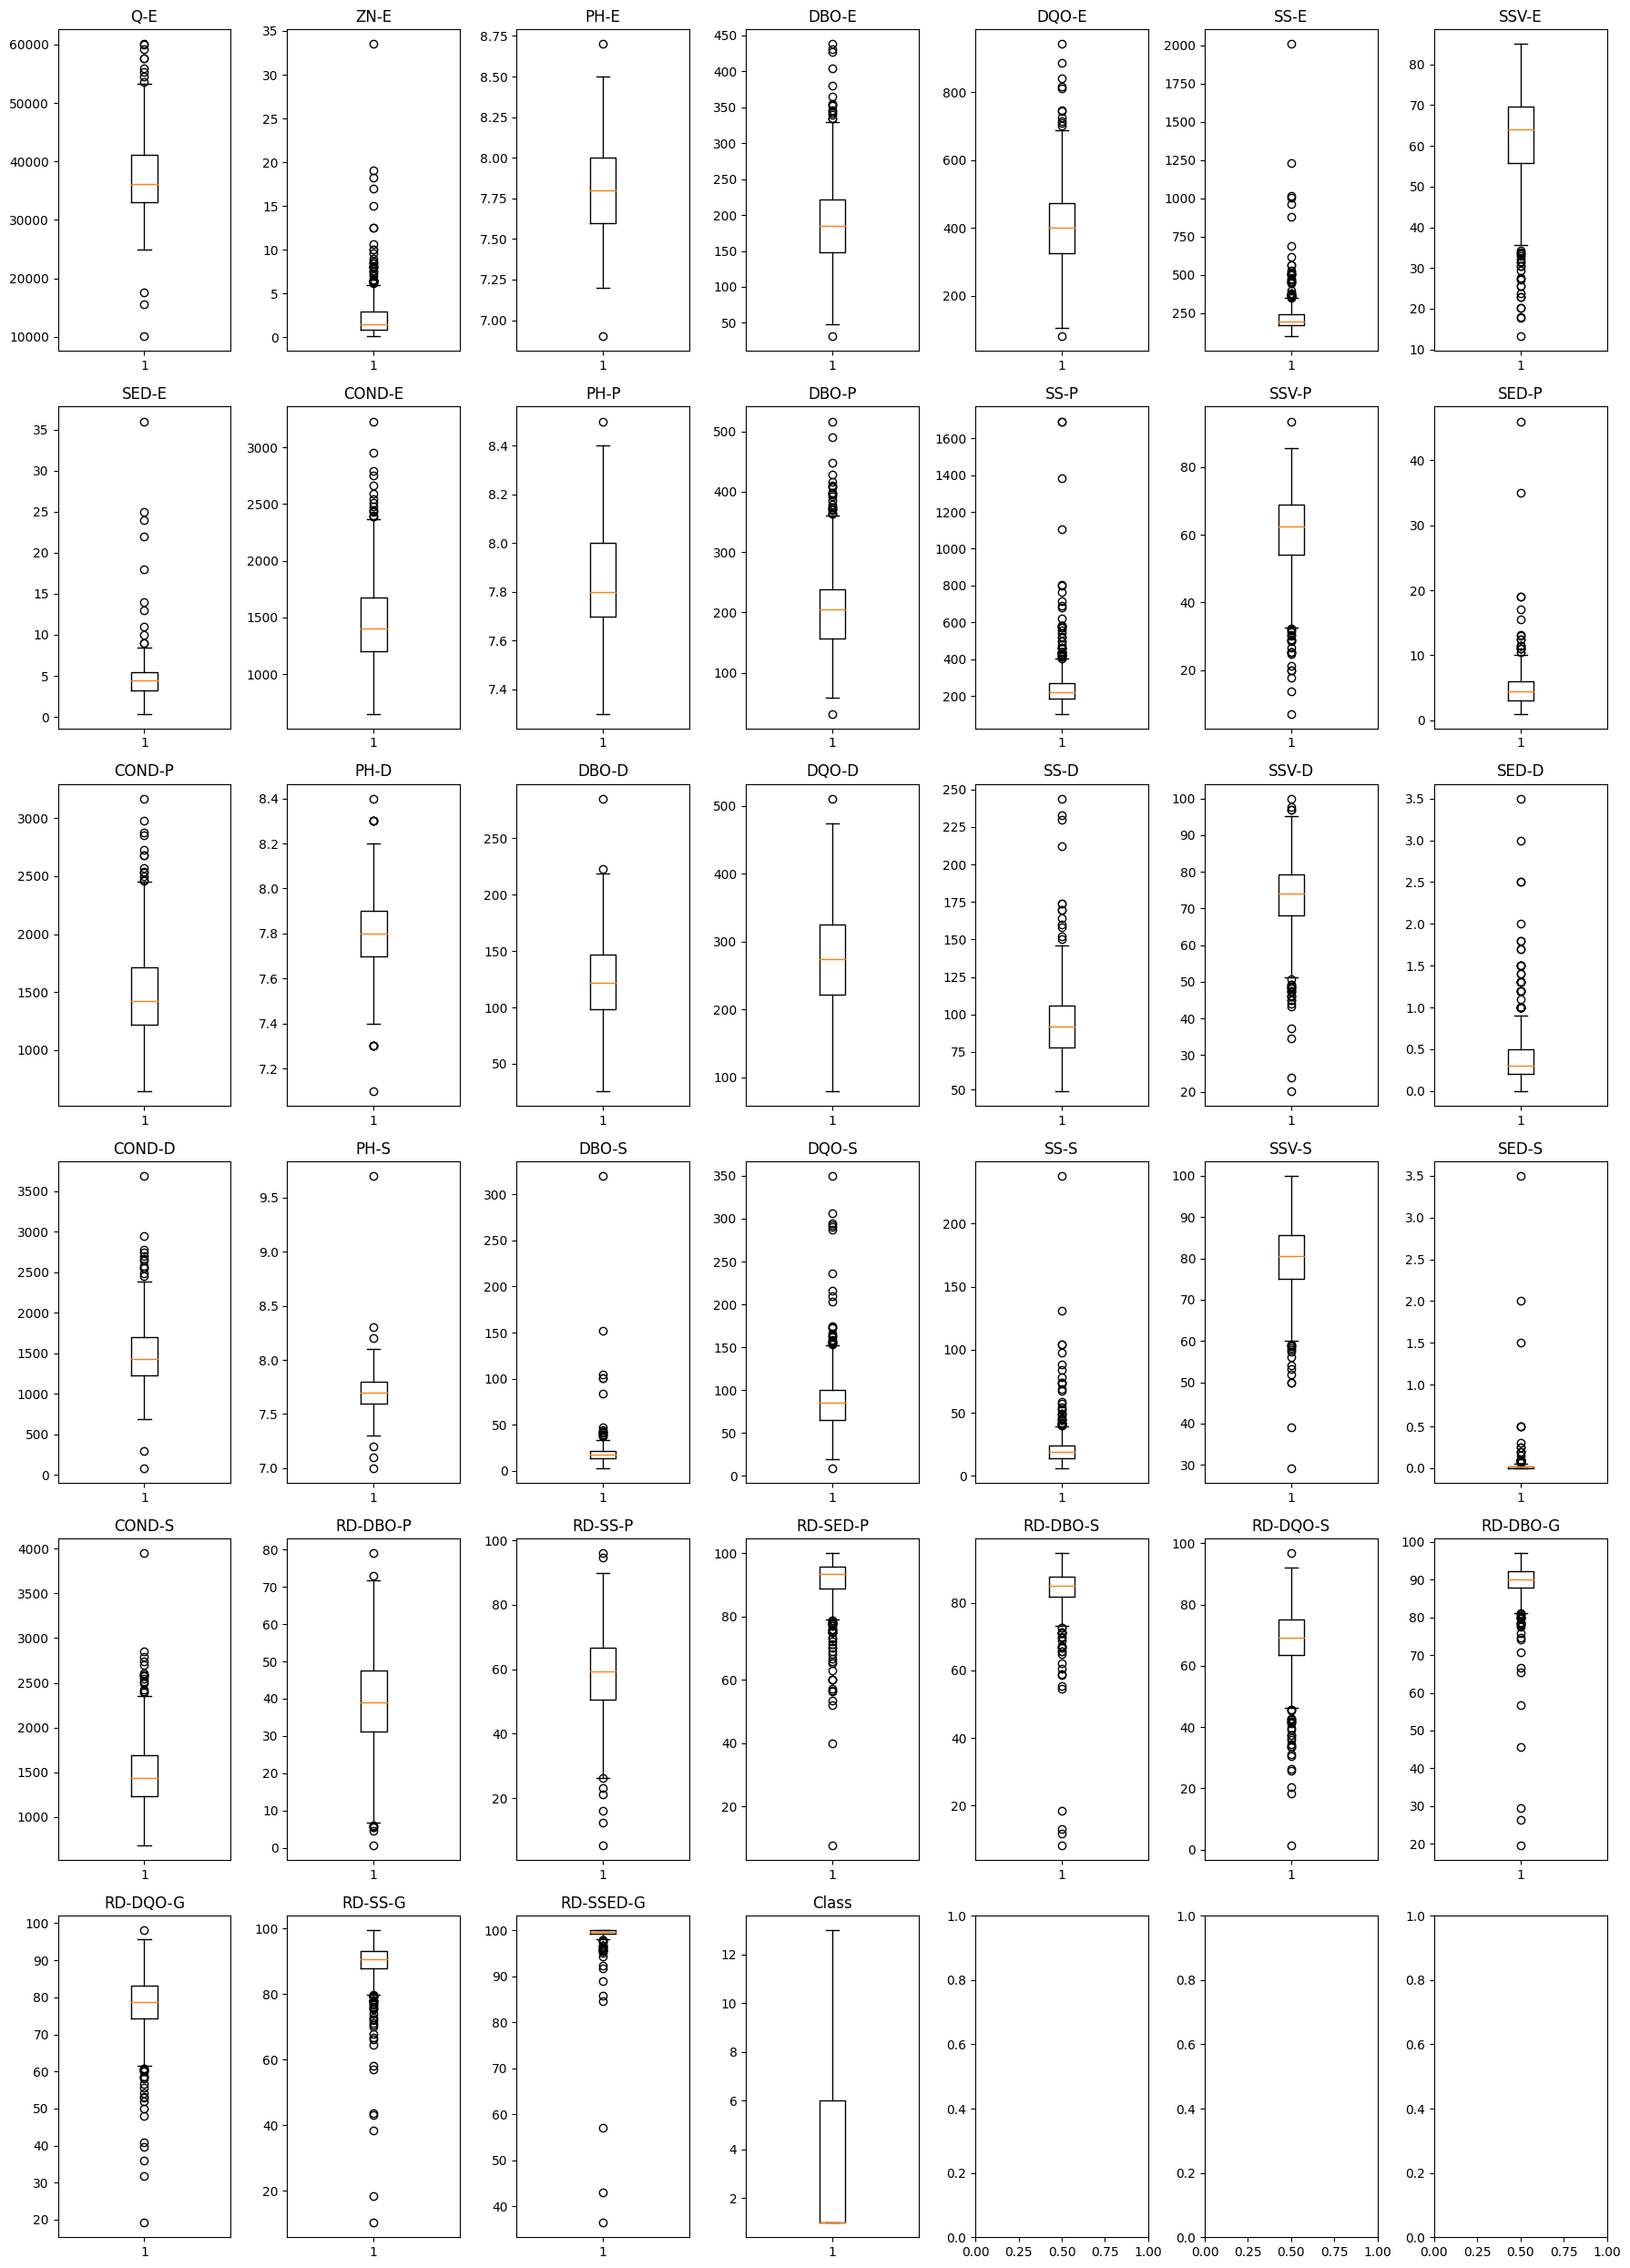

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Menampilkan Boxplot dataframe untuk seluruh column
fig, ax = plt.subplots(nrows=6, ncols=7, figsize=(18, 25))
row = 0
col = 0
for i, kolom in enumerate(df_wt3[0:8]):
    if col == 7:
        col = 0
        row += 1

    ax[row, col].boxplot(df_wt3[kolom])
    ax[row, col].set_title(kolom)

    col += 1

plt.tight_layout()
plt.show()

In [ ]:
#Pengecekan manual terhadap Outlier
df_wt3

Q-E       ZN-E  PH-E       DBO-E       DQO-E         SS-E  \
0    44101.00000   1.500000   7.8  188.714286  407.000000   166.000000   
1    39024.00000   3.000000   7.7  188.714286  443.000000   214.000000   
2    32229.00000   5.000000   7.6  188.714286  528.000000   186.000000   
3    35023.00000   3.500000   7.9  205.000000  588.000000   192.000000   
4    36924.00000   1.500000   8.0  242.000000  496.000000   176.000000   
5    38572.00000   3.000000   7.8  202.000000  372.000000   186.000000   
6    41115.00000   6.000000   7.8  188.714286  552.000000   262.000000   
7    36107.00000   5.000000   7.7  215.000000  489.000000   334.000000   
8    29156.00000   2.500000   7.7  206.000000  451.000000   194.000000   
9    39246.00000   2.000000   7.8  172.000000  506.000000   200.000000   
10   42393.00000   0.700000   7.9  189.000000  478.000000   230.000000   
11   42857.00000   1.500000   7.7  238.000000  319.000000   292.000000   
12   42911.00000   0.700000   7.6  114.000000  252.000000   116.000000   
13   40376.00000   2.359065   8.1  204.000000  333.000000   174.000000   
14   40923.00000   3.500000   7.6  146.000000  329.000000   188.000000   
15   43830.00000   1.500000   7.8  177.000000  512.000000   214.000000   
16   39165.00000   1.200000   7.4  250.000000  447.000000   252.000000   
17   35791.00000   1.200000   7.8  277.000000  466.000000   246.000000   
18   37419.00000   1.200000   7.6  219.000000  446.000000   222.000000   
19   40983.00000   3.000000   7.6  182.000000  431.000000   214.000000   
20   42217.00000   8.500000   7.5  138.000000  333.000000   240.000000   
21   47665.00000   1.200000   7.7  156.000000  405.000000   200.000000   
22   44314.00000   3.000000   7.8  155.000000  389.000000   308.000000   
23   40841.00000   1.000000   7.6  179.000000  389.000000   168.000000   
24   41157.00000   3.000000   8.0  145.000000  398.000000   192.000000   
25   40078.00000   1.400000   7.9  198.000000  464.000000   228.000000   
26   44365.00000   7.500000   7.9  188.714286  365.000000   212.000000   
27   43080.00000   4.250000   7.8   95.000000  349.000000   136.000000   
28   29414.00000   3.000000   7.6  160.000000  374.000000   168.000000   
29   37312.00000   1.000000   8.1  205.000000  492.000000   192.000000   
30   38568.00000   0.700000   8.2  233.000000  506.000000   204.000000   
31   38655.00000   1.500000   7.9  179.000000  344.000000   172.000000   
32   34193.00000   2.000000   8.0  166.000000  396.000000   176.000000   
33   36332.00000   3.500000   7.9  120.000000  455.000000   184.000000   
34   32484.00000   0.900000   7.5  188.714286  388.000000   170.000000   
35   37724.00000   1.000000   7.9  188.714286  526.000000   206.000000   
36   36446.00000   1.000000   7.7  188.714286  710.000000   366.000000   
37   35636.00000   1.200000   8.0  203.000000  469.000000   264.000000   
38   34746.00000   1.000000   7.7  208.000000  427.000000   192.000000   
39   34893.00000   1.200000   8.0  235.000000  406.898273   228.000000   
40   37102.00000   2.000000   7.8  196.000000  353.000000   174.000000   
41   41598.00000   1.200000   8.2  194.000000  419.000000   186.000000   
42   38058.00000   1.000000   7.8  193.000000  424.000000   170.000000   
43   40716.00000   3.500000   8.1  188.714286  524.000000   222.000000   
44   40868.00000   1.500000   8.1  206.000000  490.000000   190.000000   
45   36358.00000   2.000000   7.7  192.000000  298.000000   162.000000   
46   40879.00000   1.200000   7.6  188.714286  435.000000   196.000000   
47   44150.00000   1.000000   8.1  188.714286  516.000000   164.000000   
48   45779.00000   3.000000   7.8  188.714286  376.000000   194.000000   
49   41230.00000   0.350000   7.6  120.000000  344.000000   136.000000   
50   37386.00000   1.400000   7.9  165.000000  470.000000   170.000000   
51   34535.00000   1.000000   7.8  232.000000  518.000000   220.000000   
52   32527.00000   3.000000   7.8  187.000000  460.000000   180.000000   
53   27760.00000 

In [ ]:
df_wt4 = df_wt3

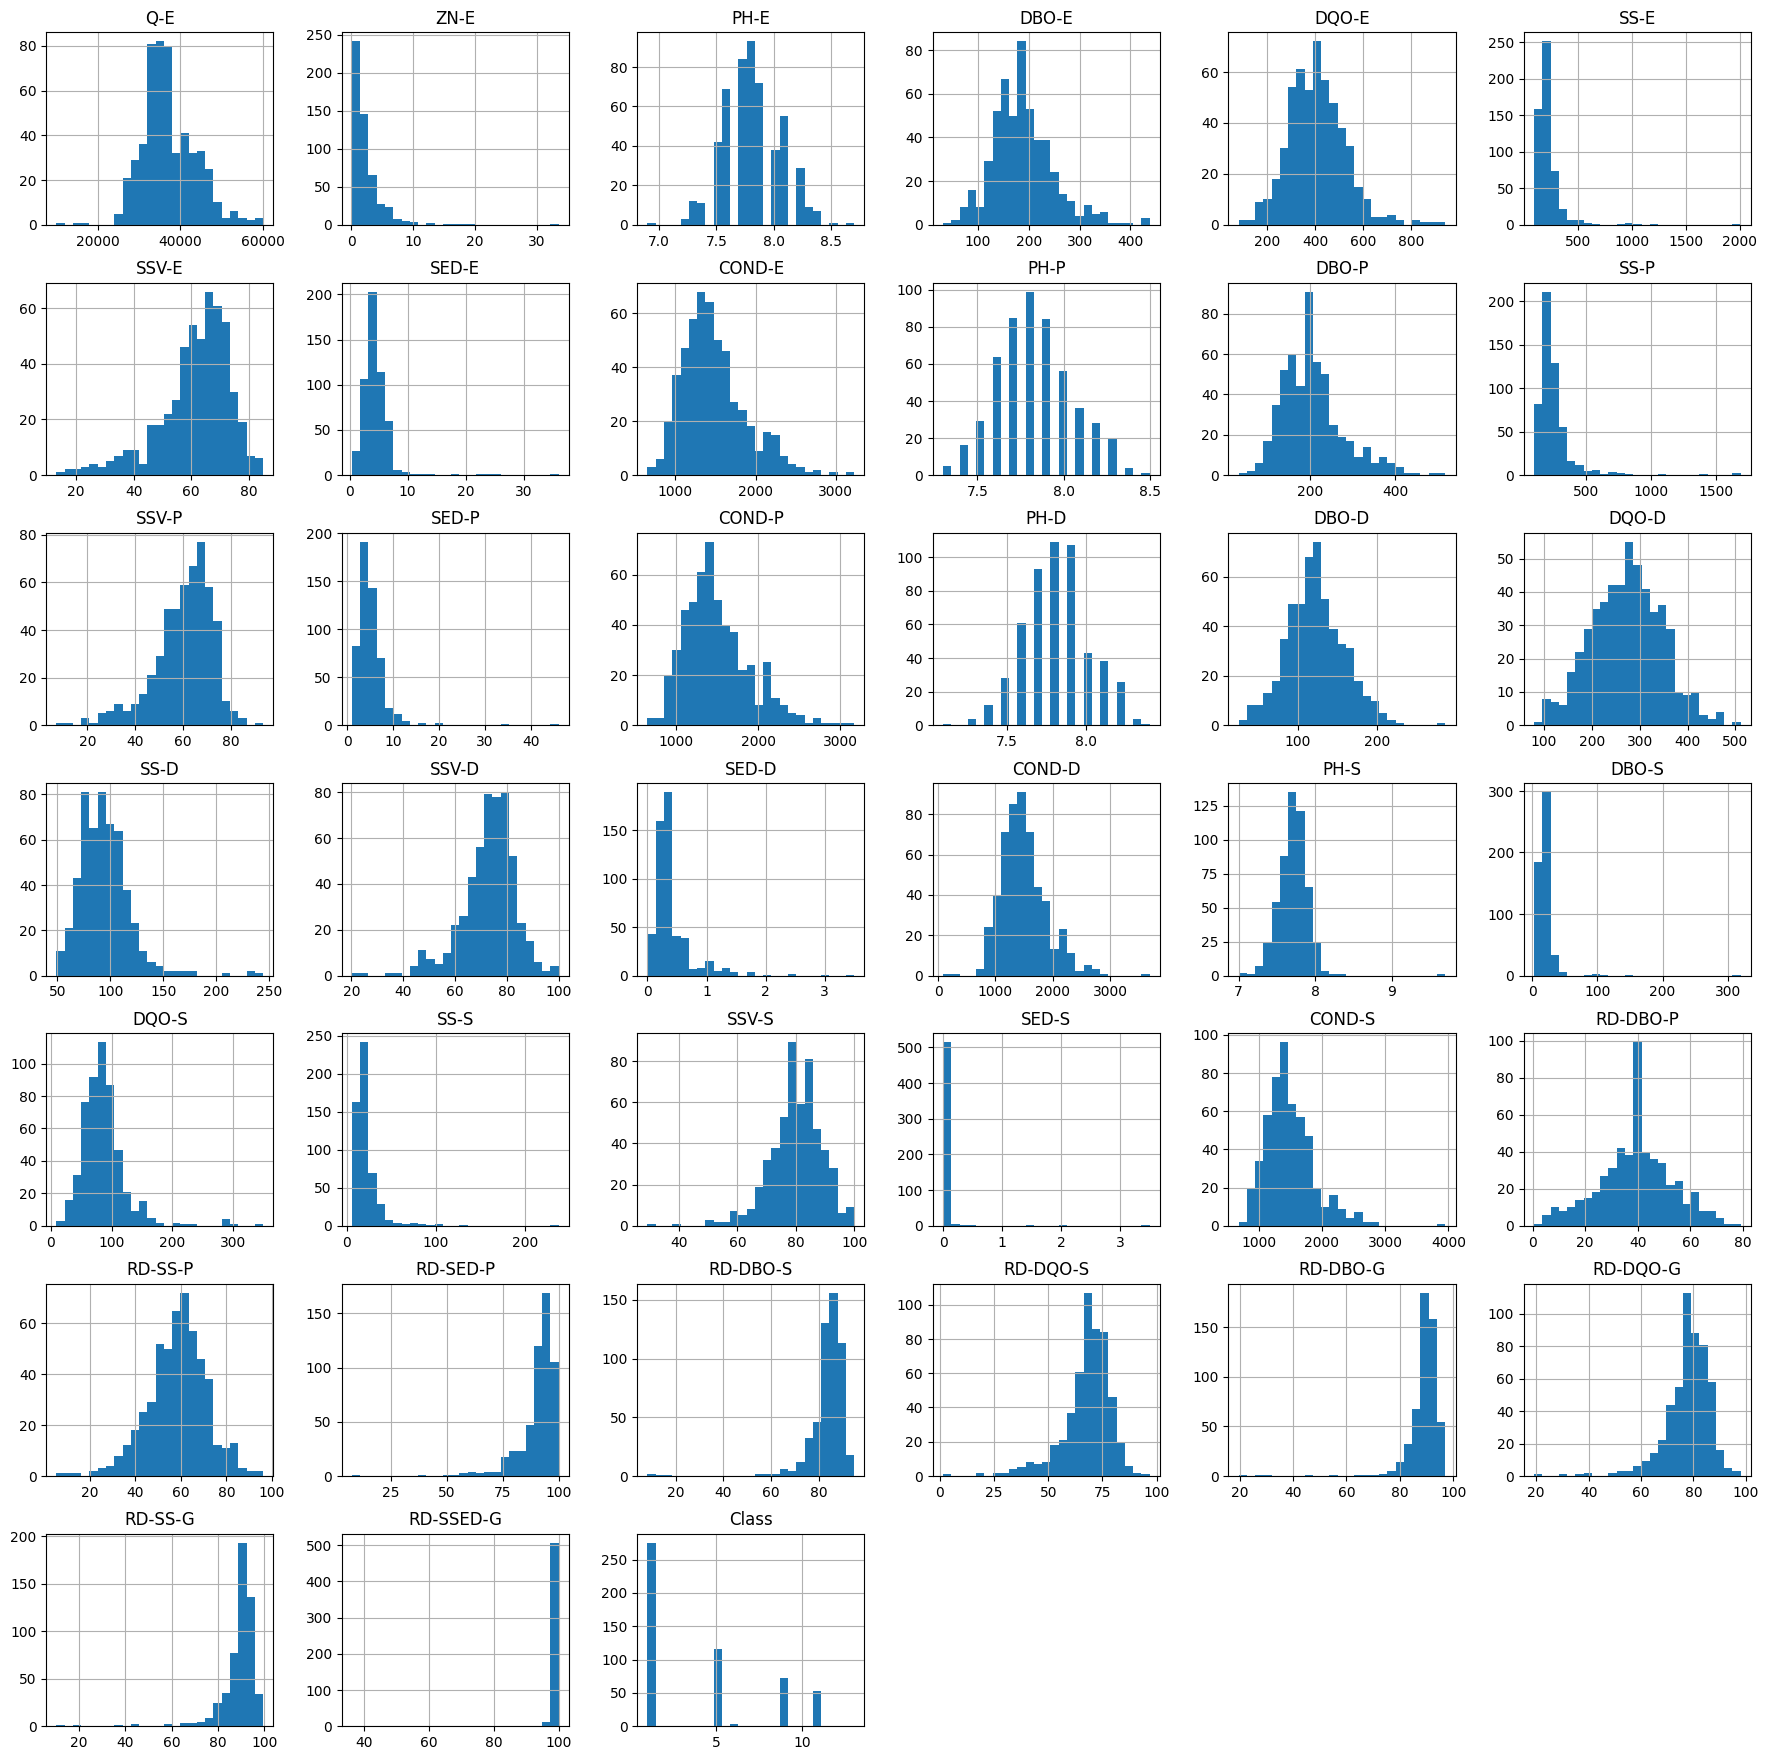

In [ ]:
# Menampilkan Histogram
df_wt3 = pd.DataFrame(df_wt3)
df_wt3.hist(figsize=(22, 22), bins=25)
plt.show()

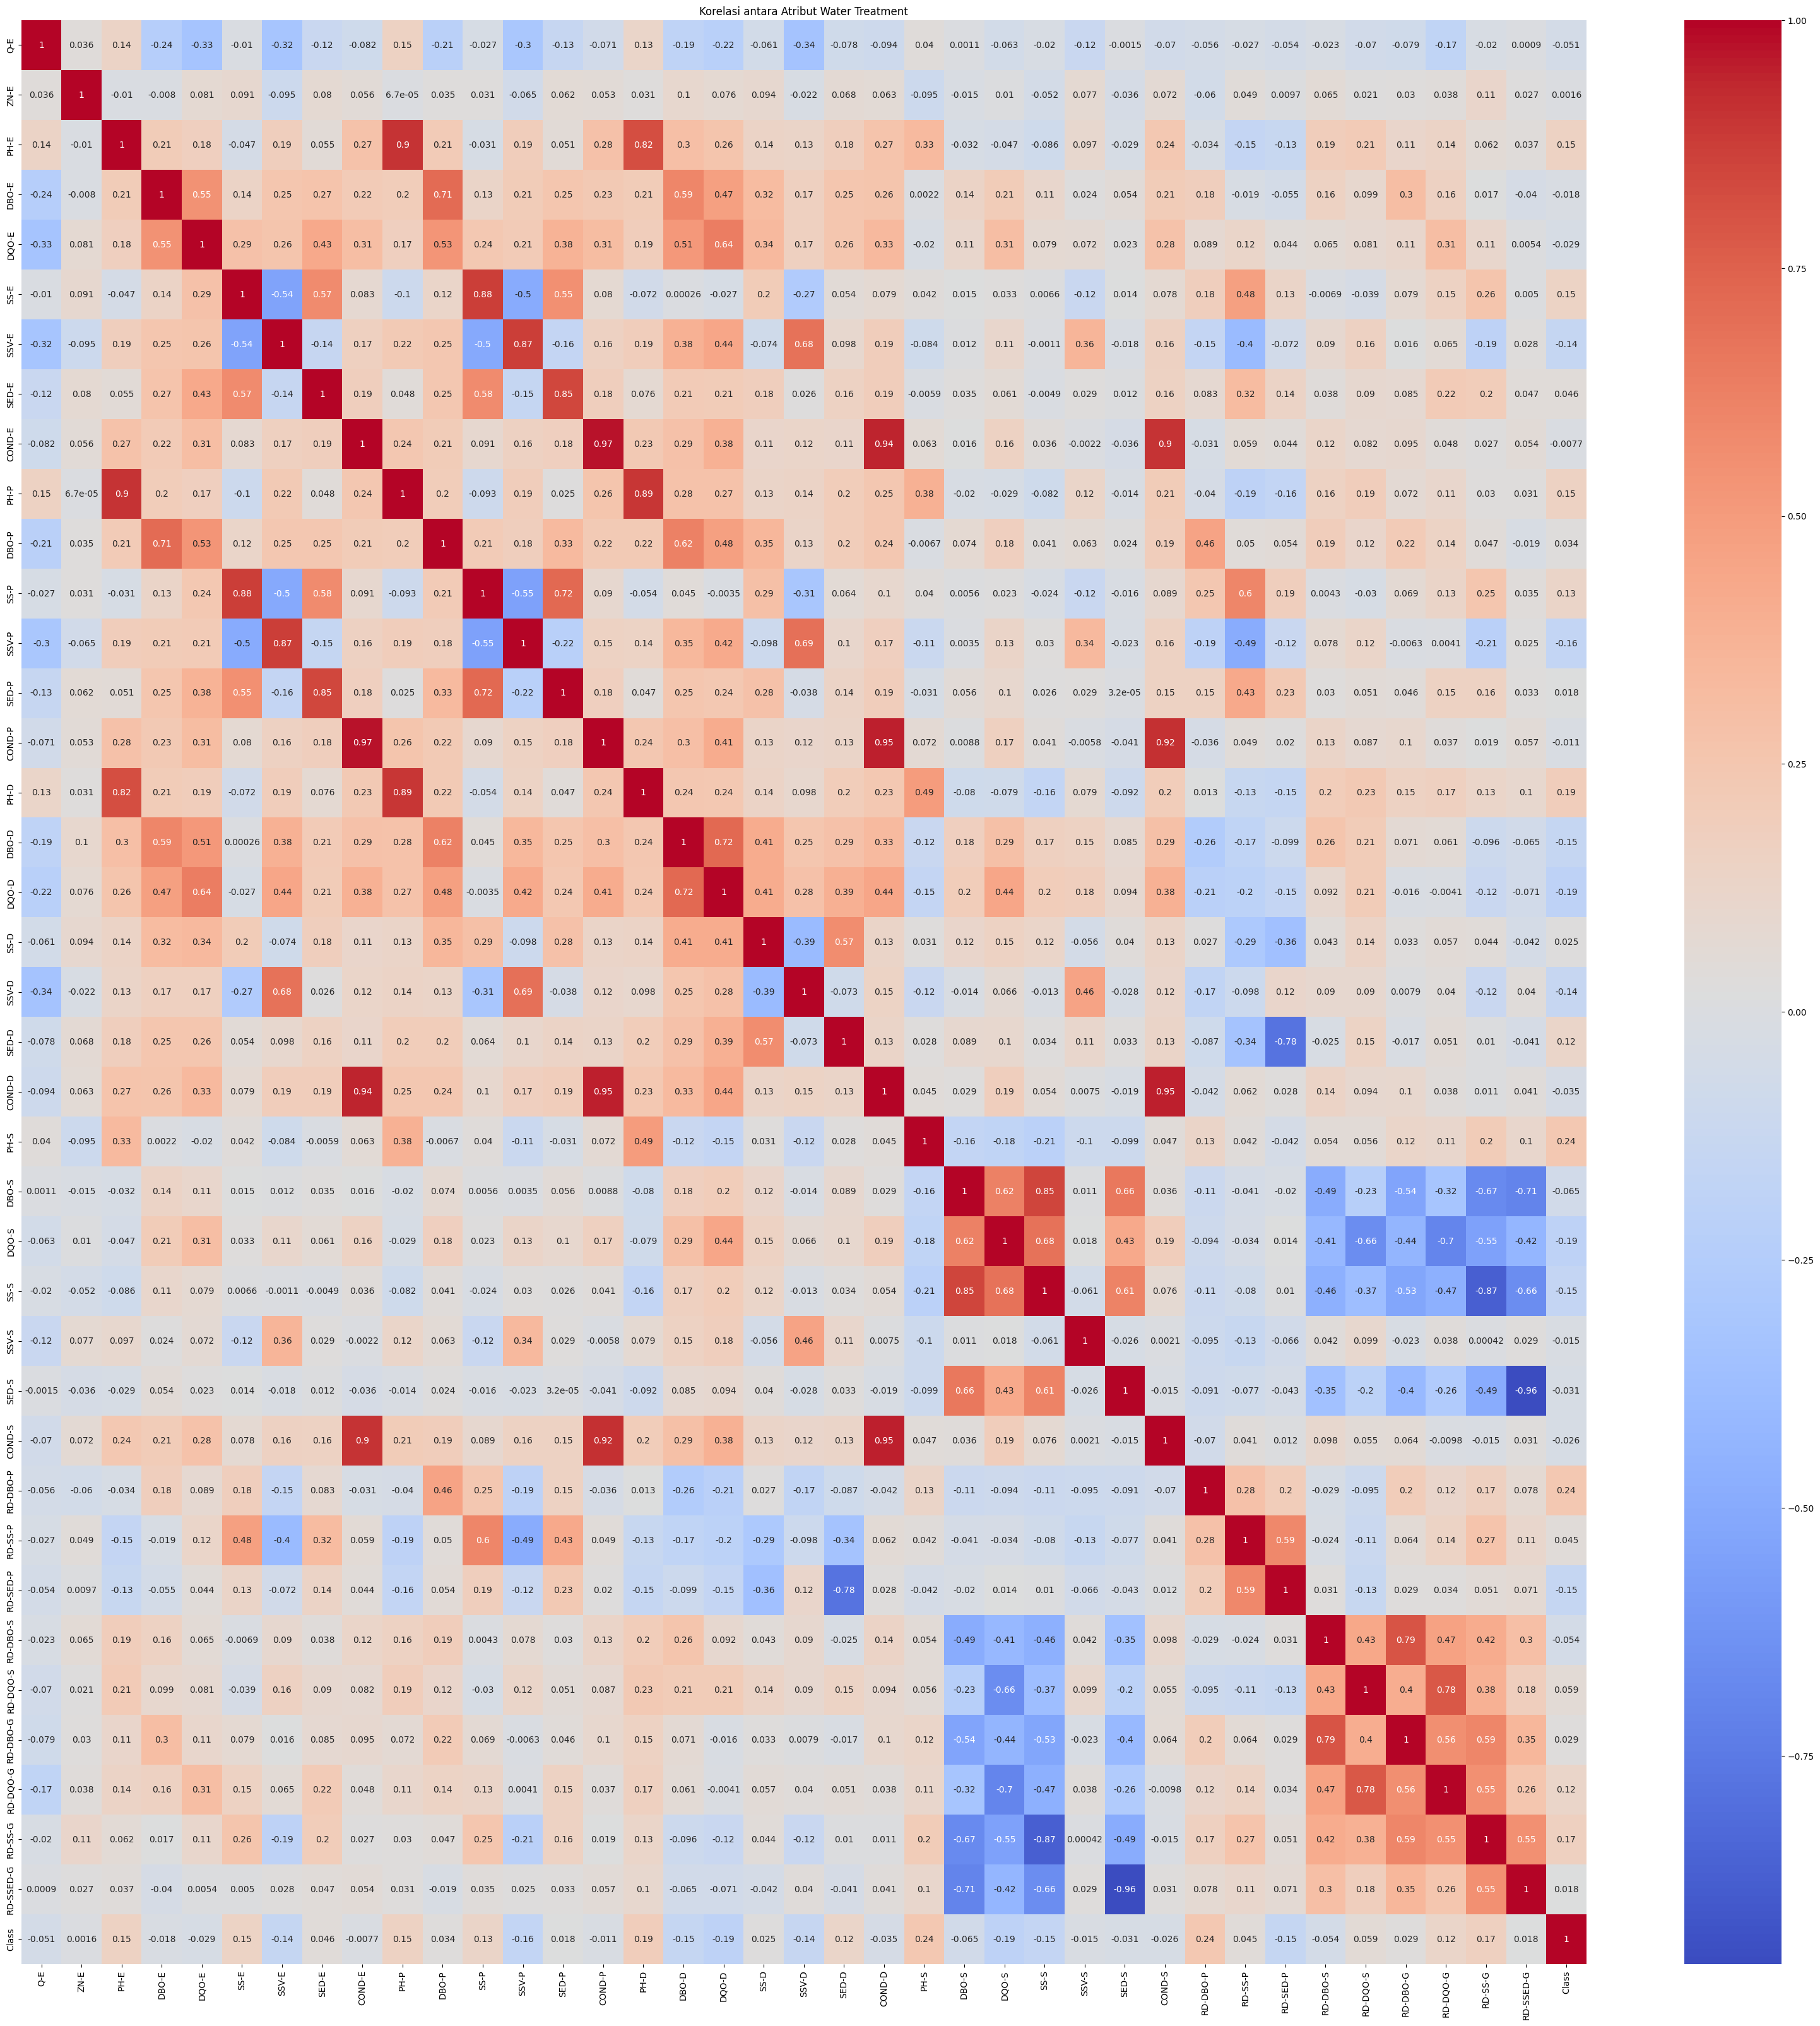

In [ ]:
# Menampilkan Korelasi antara atribut
correlation_matrix = df_wt3.corr()
plt.figure(figsize=(40, 40))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Korelasi antara Atribut Water Treatment')
plt.show()

<ipython-input-99-d5abd8ba6fd4>:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(4, 3))


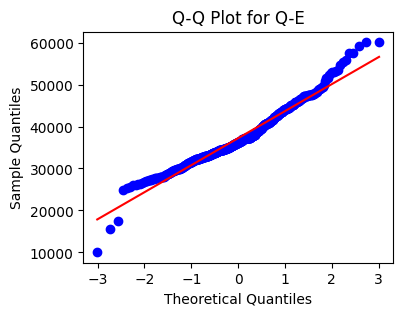

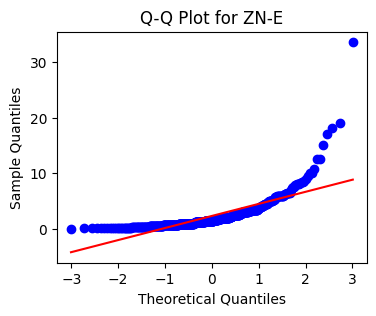

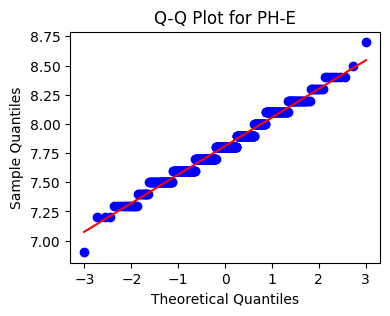

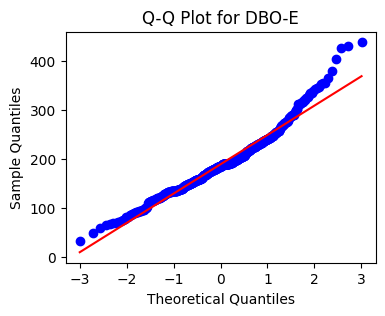

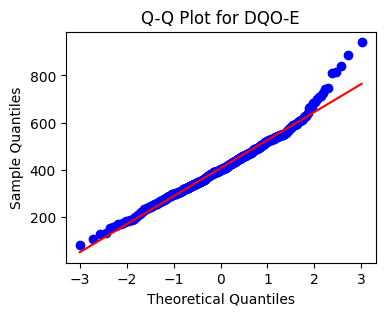

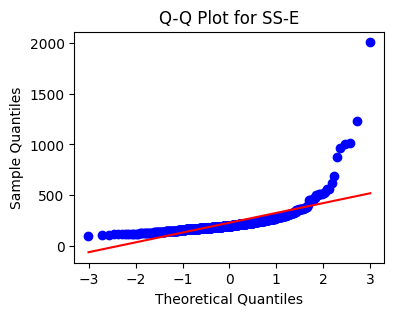

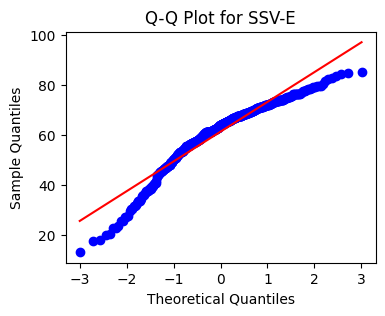

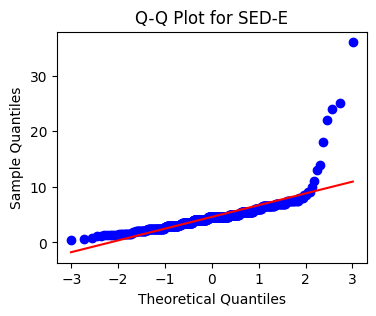

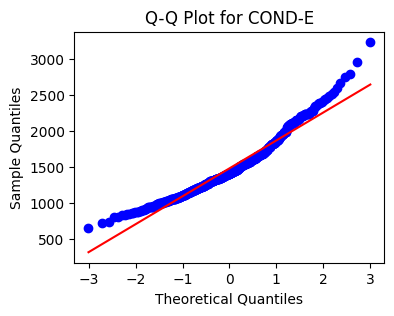

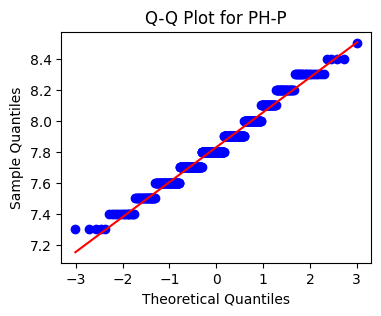

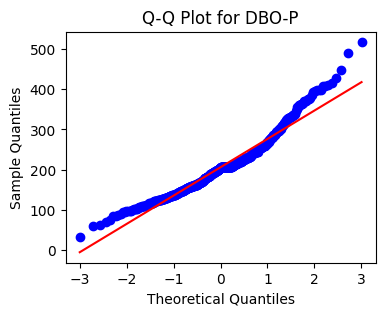

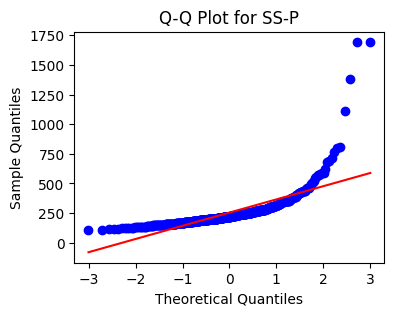

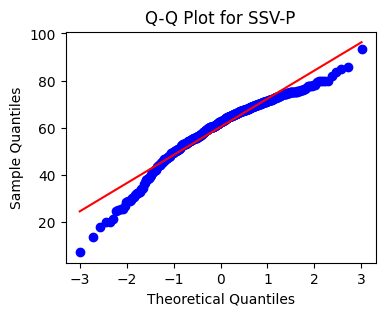

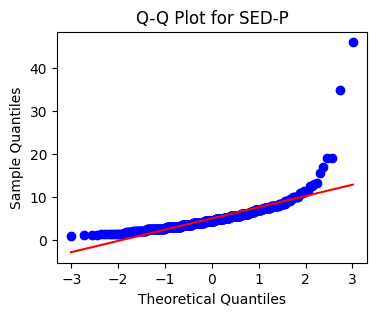

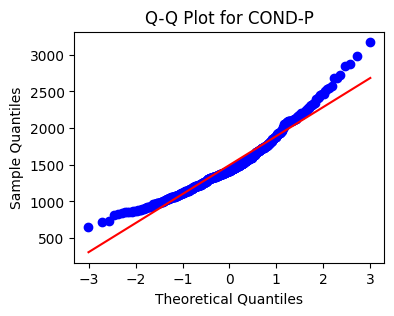

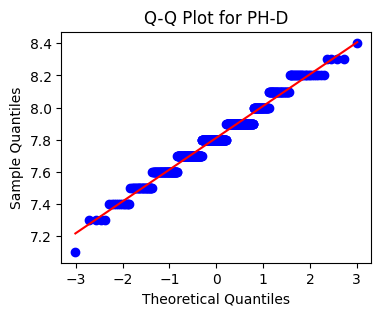

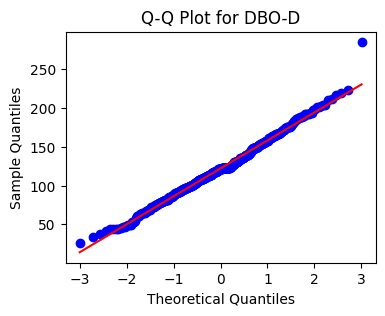

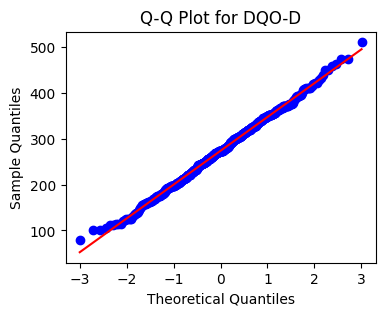

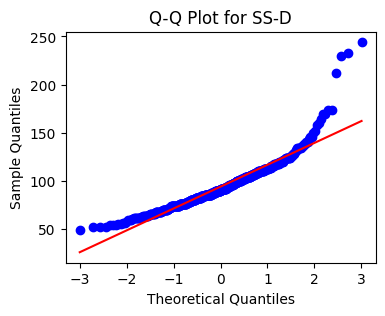

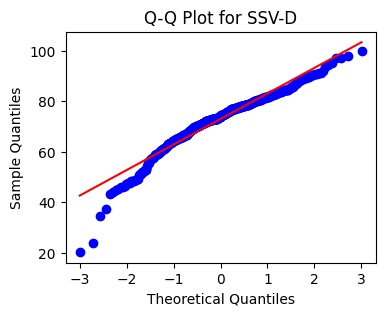

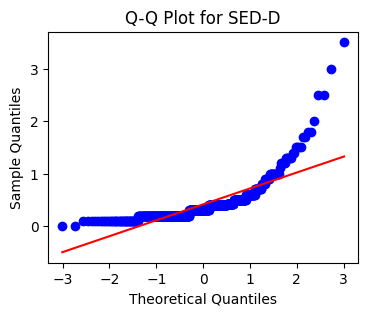

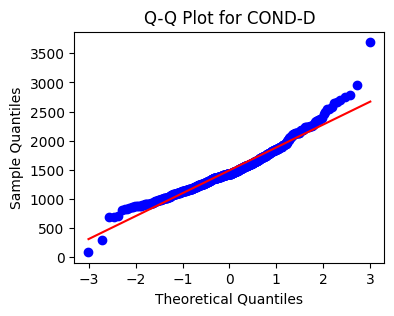

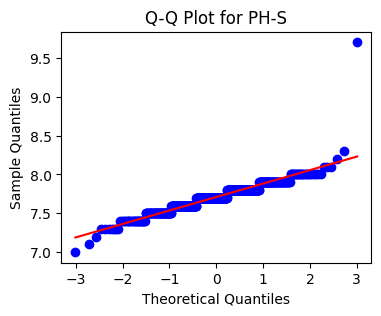

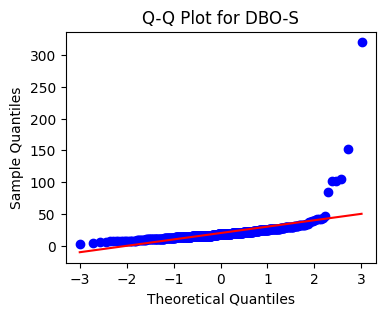

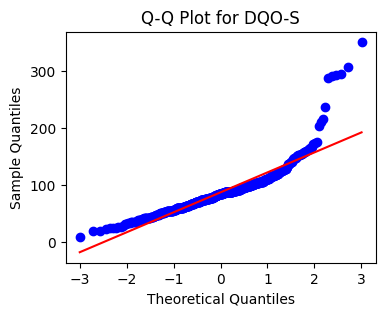

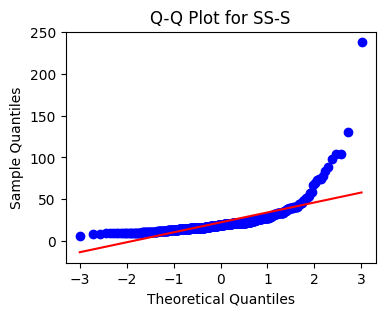

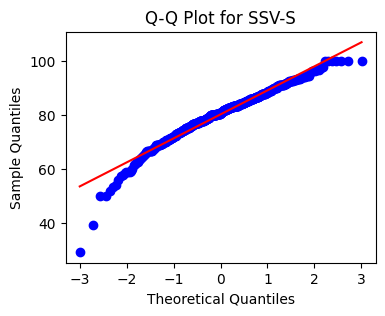

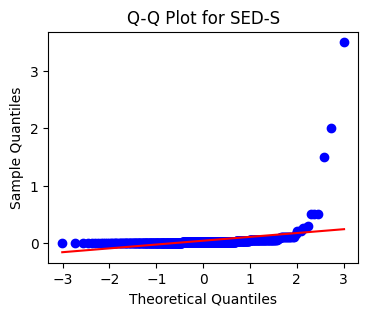

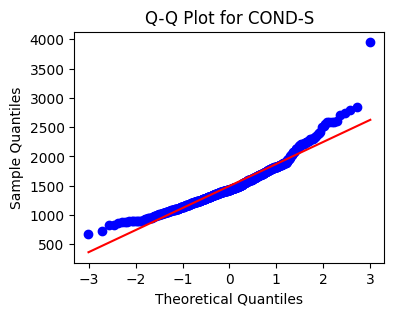

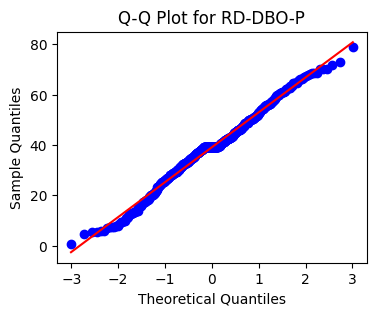

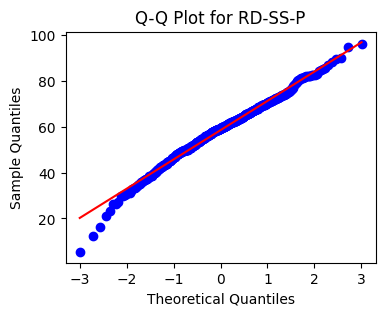

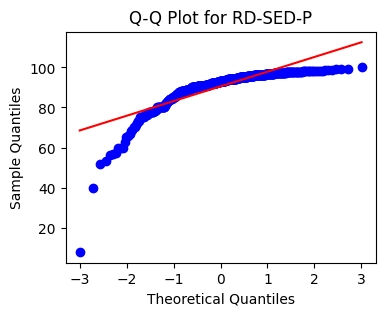

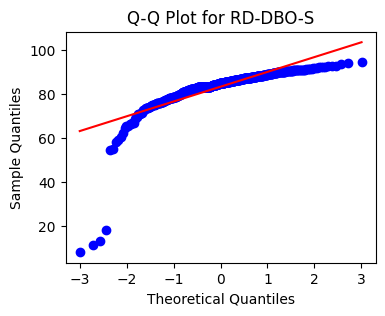

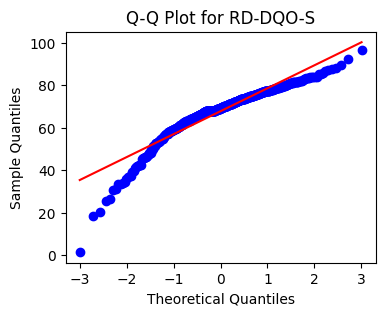

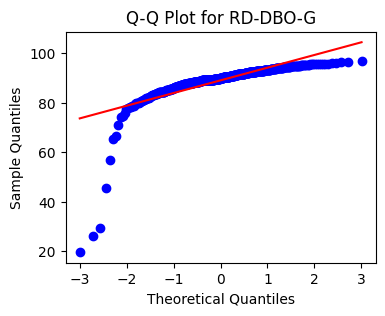

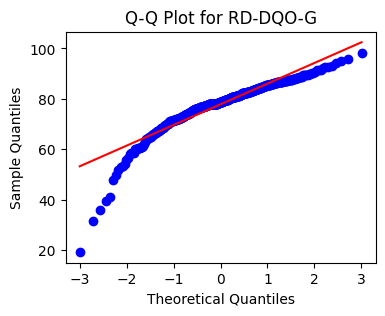

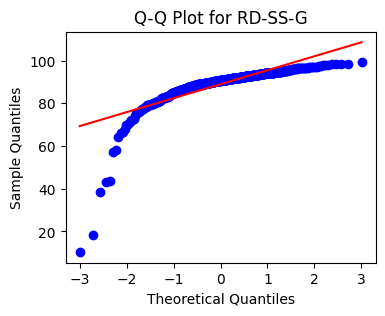

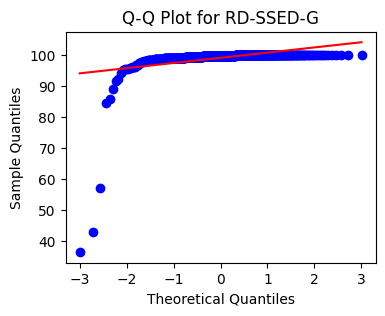

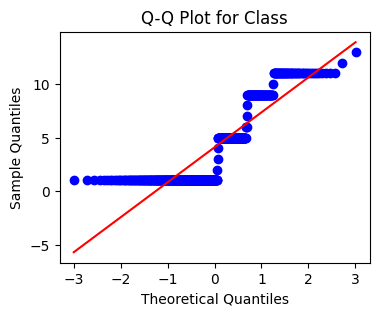

In [ ]:
# Menampilkan Q-Q Plot
import matplotlib.pyplot as plt
import scipy.stats as stats
# Membuat Q-Q plot untuk setiap kolom numerik
numerical_columns = df_wt3.select_dtypes(include=['int', 'float']).columns


for col in numerical_columns:
    plt.figure(figsize=(4, 3))
    stats.probplot(df_wt3[col], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot for {col}')
    plt.xlabel("Theoretical Quantiles")
    plt.ylabel("Sample Quantiles")


plt.show()

In [ ]:
# Fungsi untuk menangani outlier menggunakan IQR
def handle_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Mengganti nilai di luar batas IQR dengan nilai batas
    df_outliers_handled = df.mask((df < lower_bound) | (df > upper_bound), df.median(), axis=1)
    return df_outliers_handled


In [ ]:
# Memanggil fungsi untuk menangani outlier pada beberapa kolom
outlier_handle = ['ZN-E', 'SS-E', 'SED-E', 'SS-P', 'SED-P', 'PH-S', 'DBO-S', 'SS-S', 'SED-S', 'COND-S', 'RD-SED-P', 'RD-DBO-S']
df_wt4[outlier_handle] = handle_outliers(df_wt4[outlier_handle])



In [ ]:
# Tampilkan DataFrame setelah penanganan outlier
df_wt4.shape

(527, 39)

<ipython-input-103-4e5a9ad9f789>:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(4, 3))


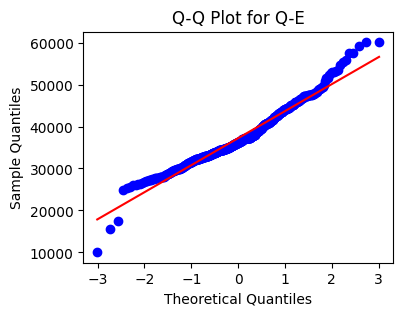

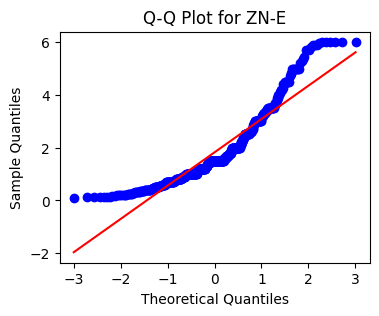

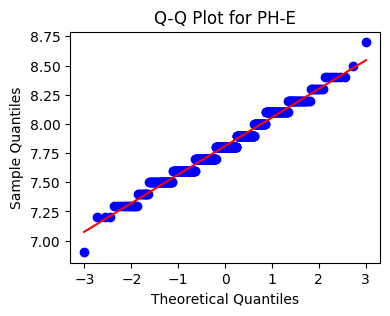

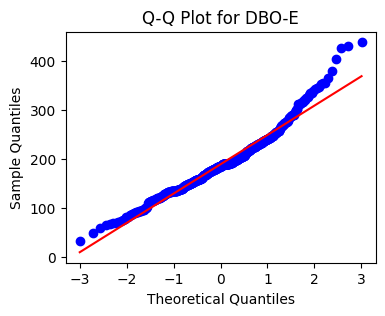

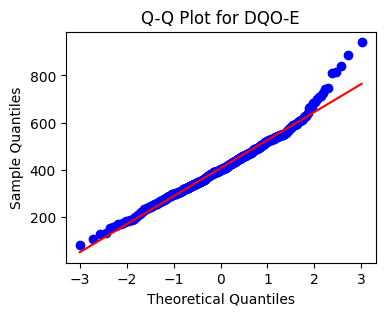

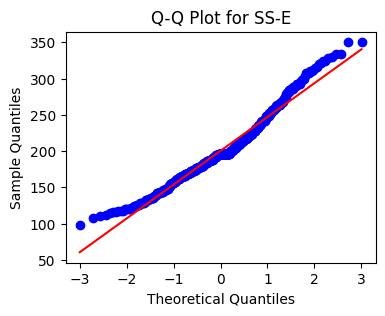

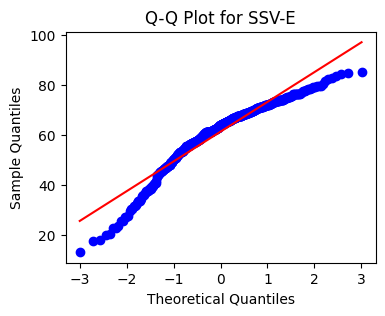

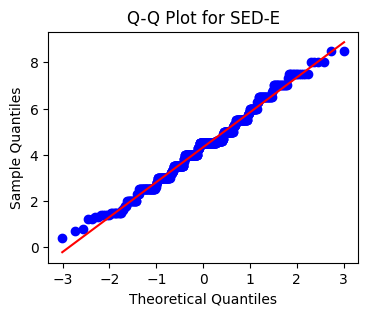

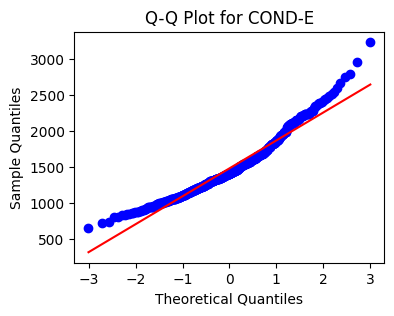

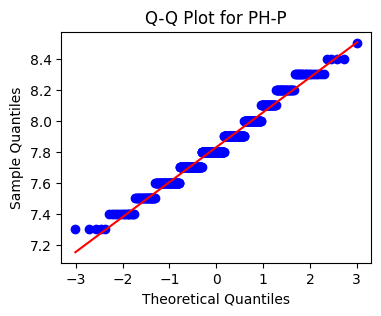

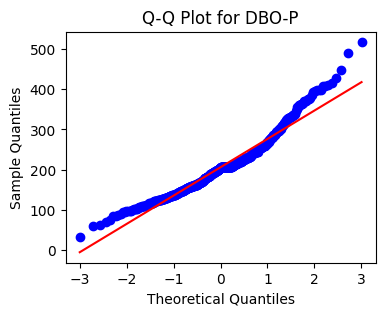

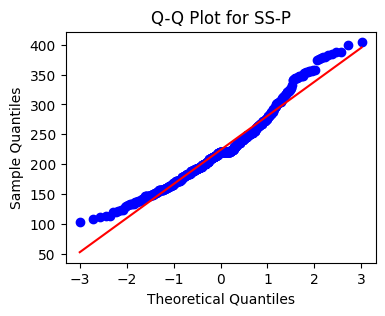

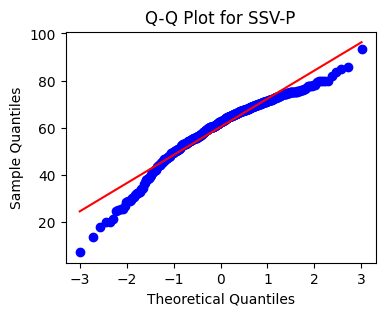

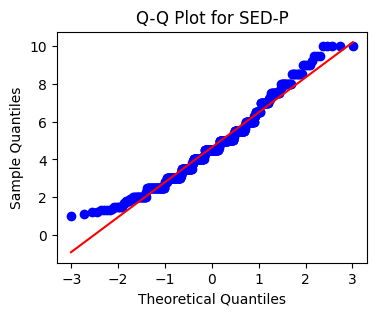

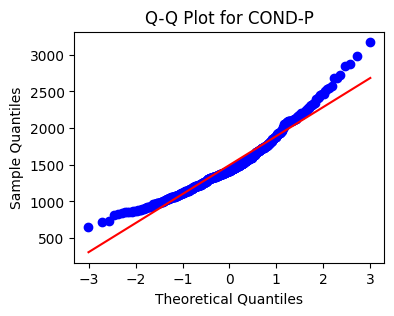

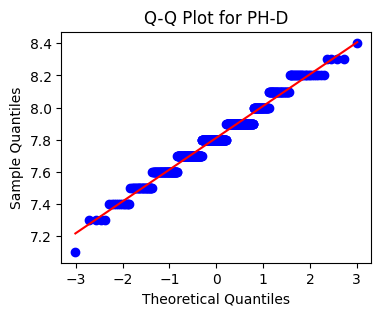

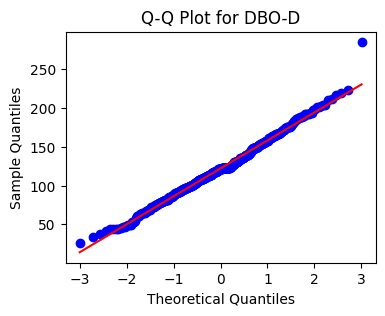

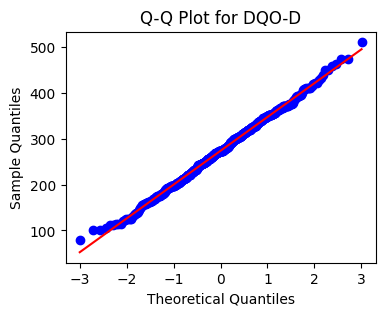

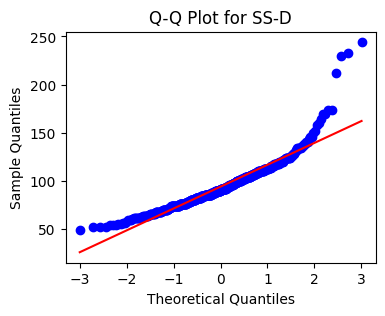

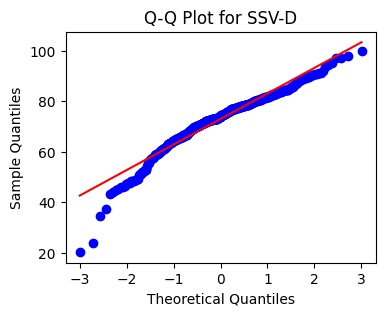

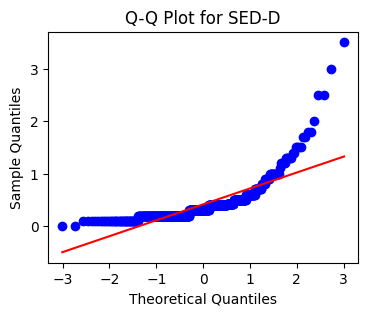

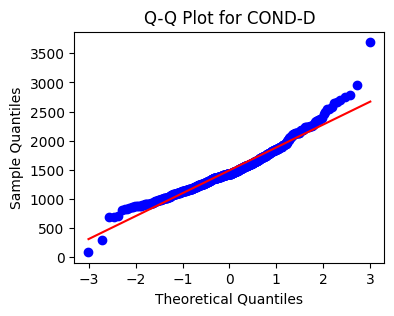

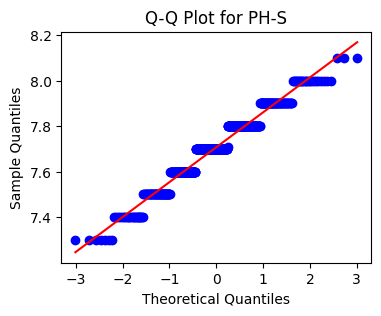

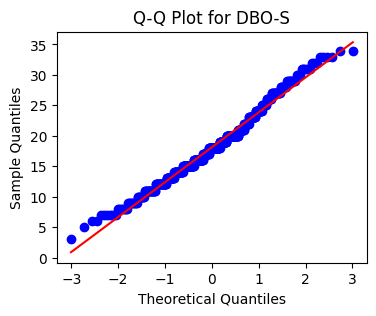

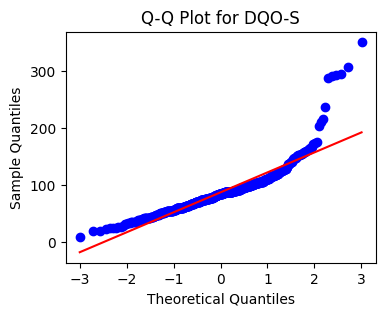

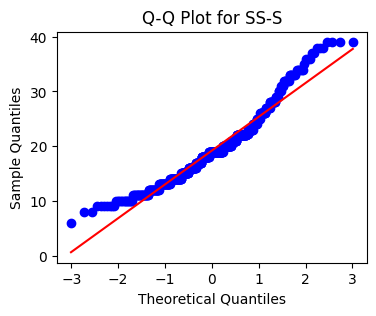

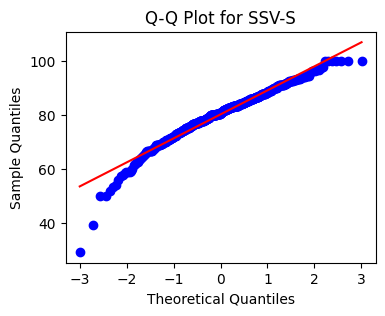

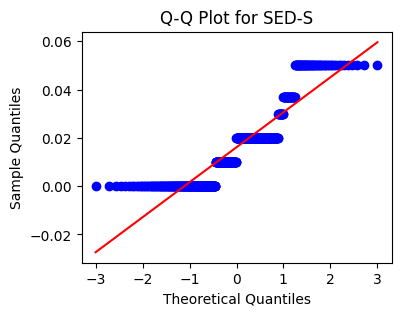

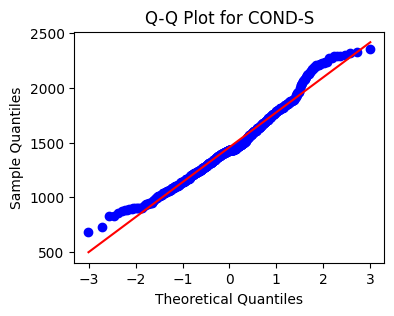

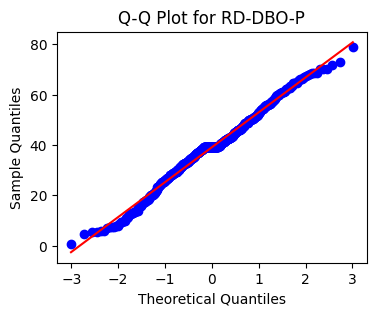

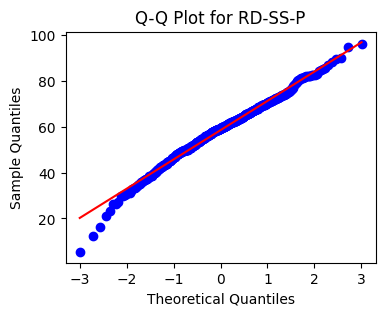

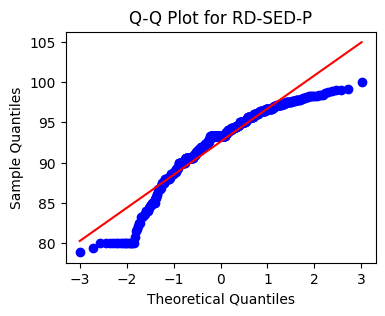

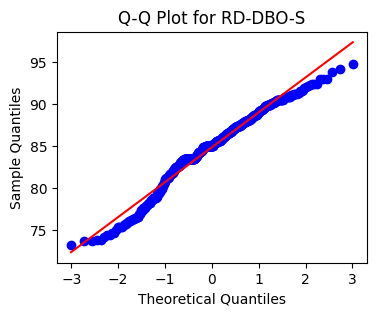

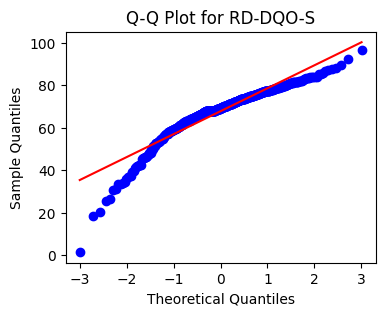

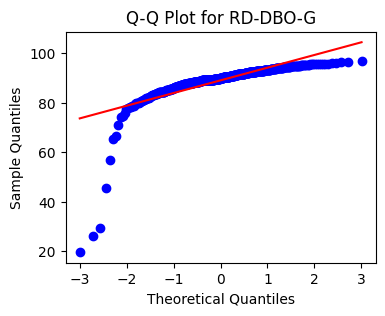

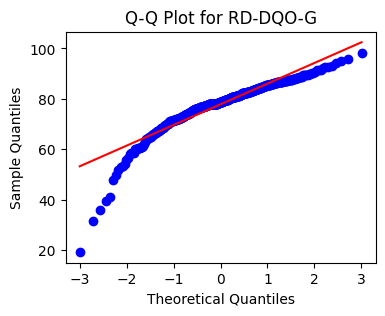

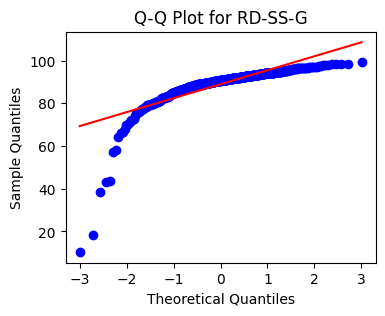

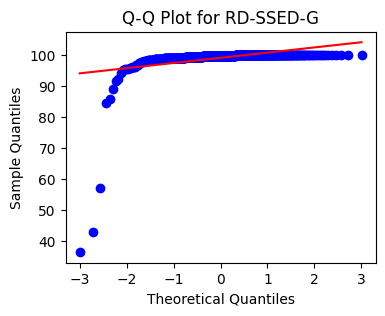

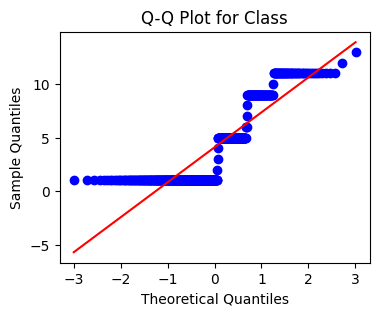

In [ ]:
# Menampilkan Q-Q Plot
import matplotlib.pyplot as plt
import scipy.stats as stats
# Membuat Q-Q plot untuk setiap kolom numerik
numerical_columns = df_wt4.select_dtypes(include=['int', 'float']).columns


for col in numerical_columns:
    plt.figure(figsize=(4, 3))
    stats.probplot(df_wt4[col], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot for {col}')
    plt.xlabel("Theoretical Quantiles")
    plt.ylabel("Sample Quantiles")


plt.show()

# **PROSES DATA**

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Memisahkan atribut dan target
X = df_wt4.drop(['Class'], axis=1)
y = df_wt4['Class']
model = RandomForestClassifier()

# Buat objek KFold untuk mengontrol lipatan cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=60)

# Gunakan cross_val_score untuk melakukan cross-validation
scores = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')

# Hasil cross-validation
print("Akurasi cross-validation:", scores)
print("Rata-rata akurasi:", np.mean(scores))

Akurasi cross-validation: [0.77358491 0.8490566  0.64150943 0.75471698 0.81132075 0.81132075
 0.81132075 0.73076923 0.88461538 0.78846154]
Rata-rata akurasi: 0.78566763425254


In [ ]:
X.shape

(527, 38)

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Normalisasi data menggunakan StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_wt4)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

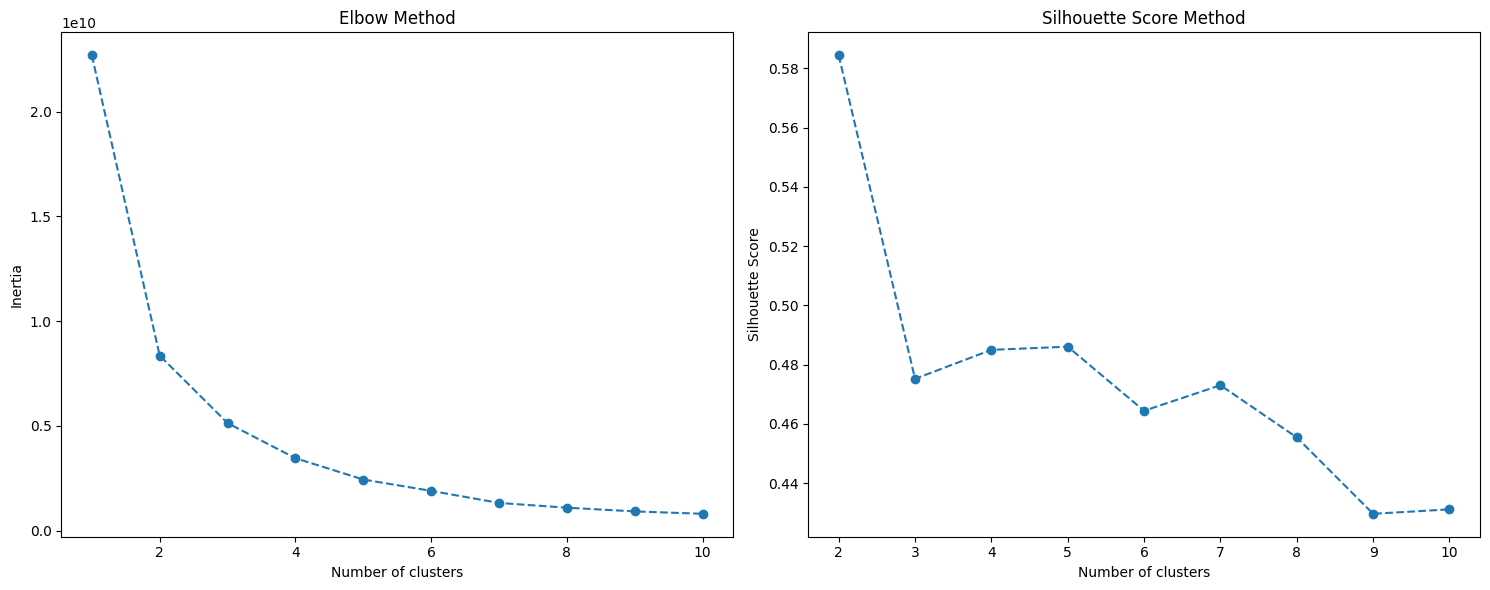

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score


# Membaca dataset
data = df_wt4

# Menghapus baris yang mengandung nilai null atau NaN jika ada
data.dropna(inplace=True)

# Menentukan jumlah klaster yang akan diuji
max_clusters = 10  # Bisa disesuaikan dengan jumlah klaster maksimal yang ingin diuji
inertia = []

# Loop untuk menghitung inertia (within-cluster sum of squares) untuk setiap jumlah klaster
for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)

# Inisialisasi range jumlah klaster yang akan diuji
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]  # dapat menyesuaikan range klaster yang diuji
silhouette_scores = []

# Iterasi untuk menemukan nilai Silhouette Score untuk setiap jumlah klaster
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(data)

    # Menghitung nilai Silhouette Score
    silhouette_avg = silhouette_score(data, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Menampilkan kedua grafik secara bersampingan
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Grafik Elbow Method
axes[0].plot(range(1, max_clusters + 1), inertia, marker='o', linestyle='--')
axes[0].set_xlabel('Number of clusters')
axes[0].set_ylabel('Inertia')
axes[0].set_title('Elbow Method')

# Grafik Silhouette Score
axes[1].plot(range_n_clusters, silhouette_scores, marker='o', linestyle='--')
axes[1].set_xlabel('Number of clusters')
axes[1].set_ylabel('Silhouette Score')
axes[1].set_title('Silhouette Score Method')

plt.tight_layout()
plt.show()


Centroid:
[[4.78472921e+04 2.08100073e+00 7.87977528e+00 1.63690209e+02
  3.16595506e+02 1.82966292e+02 5.45471148e+01 3.47500336e+00
  1.43461798e+03 7.90224719e+00 1.75124426e+02 2.09775281e+02
  5.35423635e+01 3.66742467e+00 1.45953933e+03 7.86741573e+00
  1.06039179e+02 2.31820225e+02 9.08876404e+01 6.65322301e+01
  3.73785756e-01 1.42832584e+03 7.74494382e+00 1.60437400e+01
  7.63919560e+01 1.77105127e+01 7.84725314e+01 1.51165252e-02
  1.42597753e+03 3.87340413e+01 5.66842697e+01 9.12664809e+01
  8.50896685e+01 6.63680011e+01 8.94283462e+01 7.53052778e+01
  9.00063302e+01 9.94891174e+01 4.61797753e+00 1.03370787e+00]
 [3.40687837e+04 1.80013974e+00 7.79230769e+00 1.96825549e+02
  4.44056714e+02 2.12256946e+02 6.32830752e+01 4.79144097e+00
  1.50877885e+03 7.82163462e+00 2.16212072e+02 2.35250000e+02
  6.18925034e+01 5.22998452e+00 1.52569231e+03 7.81778846e+00
  1.28936488e+02 2.87399707e+02 9.51549267e+01 7.51032400e+01
  4.43353509e-01 1.52448077e+03 7.71105769e+00 1.88793498e+

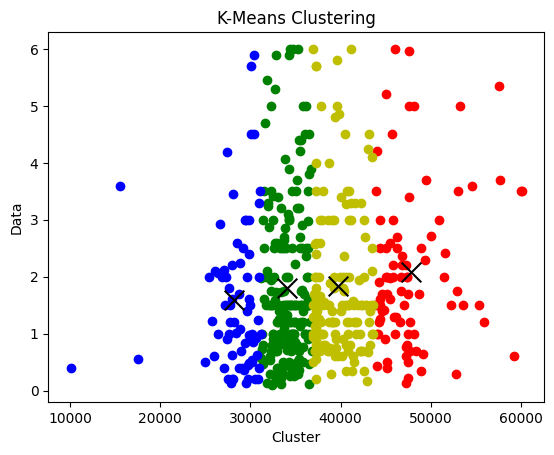

In [ ]:
import numpy as np
import pandas as pd

# Fungsi untuk menghitung jarak antara dua titik
def hitung_jarak(p1, p2):
    return np.sqrt(np.sum((p1 - p2)**2))

# Fungsi untuk menginisialisasi centroid awal secara acak
def inisialisasi_centroid(data, k):
    n_samples, n_features = data.shape
    centroids = np.zeros((k, n_features))
    for i in range(k):
        centroid = data[np.random.choice(range(n_samples))]
        centroids[i] = centroid
    return centroids

# Fungsi K-means
def k_means(data, k, max_iter=100):
    centroids = inisialisasi_centroid(data, k)
    for _ in range(max_iter):
        # Membuat clusters untuk setiap titik data
        clusters = [[] for _ in range(k)]
        for idx, sample in enumerate(data):
            # Hitung jarak antara titik dan centroid, dan pilih centroid terdekat
            distances = [hitung_jarak(sample, centroid) for centroid in centroids]
            closest_centroid_idx = np.argmin(distances)
            clusters[closest_centroid_idx].append(idx)

        # Simpan centroid lama untuk perbandingan
        old_centroids = centroids.copy()

        # Perbarui centroid untuk setiap cluster
        for cluster_idx, cluster in enumerate(clusters):
            cluster_mean = np.mean(data[cluster], axis=0)
            centroids[cluster_idx] = cluster_mean

        # Periksa konvergensi
        if np.all(old_centroids == centroids):
            break

    return centroids, clusters

# Anggap semua kolom adalah fitur, jadi 38 fitur kita gunakan semuanya
data = df_wt4.values

# Tentukan jumlah cluster
k = 4  # Sesuai dengan jumlah cluster yang paling optimal berdasar Elbow dan Silhouette

# Jalankan algoritma K-means
centroids, clusters = k_means(data, k)

# Visualisasi hasil klasterisasi
colors = ['r', 'g', 'b', 'y']  # Warna untuk setiap klaster
for cluster_idx, cluster in enumerate(clusters):
    cluster_data = data[cluster]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], c=colors[cluster_idx], label=f'Cluster {cluster_idx + 1}')

plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, c='black', label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel('Cluster')
plt.ylabel('Data')

# Cetak centroid dan cluster
print("Centroid:")
print(centroids)
print("\nClusters:")
print(clusters)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0    140
2    139
1    137
3    111
Name: ClusterK, dtype: int64


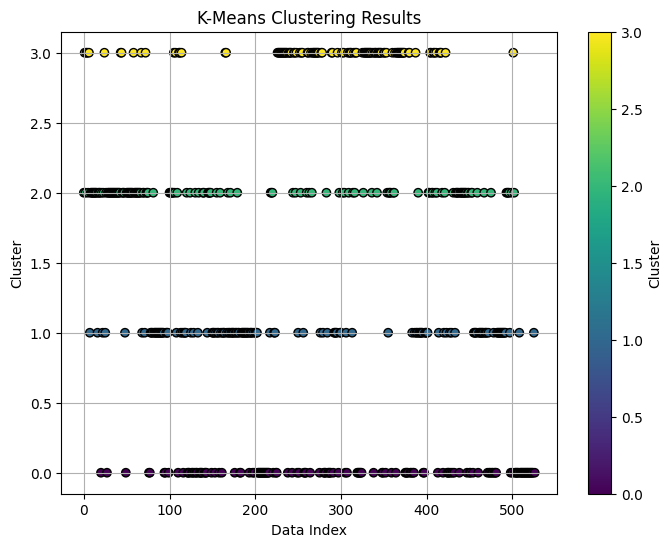

In [ ]:
# Menentukan jumlah klaster yang diinginkan
n_clusters = 4  # Ubah sesuai kebutuhan Anda

# Melakukan klasterisasi dengan K-Means
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_data)

# Menambahkan kolom klaster ke dalam DataFrame
df_wt4['ClusterK'] = kmeans.labels_


# Menampilkan hasil klasterisasi
print(df_wt4['ClusterK'].value_counts())

# Visualisasi hasil klasterisasi dalam scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df_wt4.index, df_wt4['ClusterK'], c=df_wt4['ClusterK'], cmap='viridis', marker='o', edgecolor='black')
plt.title('K-Means Clustering Results')
plt.xlabel('Data Index')
plt.ylabel('Cluster')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

In [ ]:
# Misalkan df adalah DataFrame Anda, dan 'ClusterK' adalah kolom label klaster
# Jika 'ClusterK' adalah kolom hasil klastering, Anda dapat menggunakan kolom ini untuk memisahkan data.

cluster_0 = df_wt4[df_wt4['ClusterK'] == 0]  # Data pada klaster 0
cluster_1 = df_wt4[df_wt4['ClusterK'] == 1]  # Data pada klaster 1
cluster_2 = df_wt4[df_wt4['ClusterK'] == 2]  # Data pada klaster 2
cluster_3 = df_wt4[df_wt4['ClusterK'] == 3]  # Data pada klaster 3

# Lanjutkan dengan analisis lebih lanjut pada setiap klaster


In [ ]:
cluster_0.describe()

Q-E        ZN-E        PH-E       DBO-E       DQO-E  \
count    140.000000  140.000000  140.000000  140.000000  140.000000   
mean   38468.487651    1.552065    7.728571  145.301020  302.413559   
std     7661.064164    1.283131    0.241782   50.318205   86.923132   
min    17527.000000    0.100000    7.200000   31.000000   81.000000   
25%    32369.750000    0.600000    7.600000  118.750000  255.000000   
50%    37226.567780    1.200000    7.700000  139.000000  302.500000   
75%    43693.500000    2.000000    7.900000  174.000000  347.500000   
max    60081.000000    6.000000    8.400000  365.000000  585.000000   

             SS-E       SSV-E       SED-E       COND-E        PH-P  \
count  140.000000  140.000000  140.000000   140.000000  140.000000   
mean   170.038892   59.879043    2.982592  1191.442857    7.755000   
std     36.965053   12.409339    1.071740   268.396498    0.218011   
min     98.000000   20.200000    0.800000   651.000000    7.300000   
25%    143.500000   54.950000    2.000000  1004.500000    7.600000   
50%    170.000000   61.546609    3.000000  1122.500000    7.700000   
75%    186.500000   67.700000    3.575000  1359.000000    7.900000   
max    286.000000   85.000000    5.500000  2070.000000    8.300000   

            DBO-P        SS-P       SSV-P       SED-P       COND-P  \
count  140.000000  140.000000  140.000000  140.000000   140.000000   
mean   152.053227  182.164286   59.473941    2.951440  1196.271429   
std     46.206659   40.459699   12.002138    1.136203   271.577720   
min     32.000000  104.000000   19.900000    1.000000   646.000000   
25%    122.750000  155.500000   54.000000    2.000000   995.000000   
50%    146.500000  179.000000   60.370349    3.000000  1141.500000   
75%    181.250000  200.000000   67.325000    3.500000  1378.500000   
max    296.000000  328.000000   93.500000    7.500000  2130.000000   

             PH-D       DBO-D       DQO-D        SS-D       SSV-D       SED-D  \
count  140.000000  140.000000  140.000000  140.000000  140.000000  140.000000   
mean     7.748571   94.086702  211.107805   81.703211   72.234853    0.305003   
std      0.195447   26.895319   58.401060   21.804322   11.899125    0.222450   
min      7.100000   26.000000   80.000000   49.000000   20.200000    0.000000   
25%      7.600000   77.750000  173.500000   68.000000   66.700000    0.200000   
50%      7.800000   94.500000  206.500000   78.000000   72.968482    0.200000   
75%      7.900000  116.000000  250.000000   92.000000   80.125000    0.400000   
max      8.300000  164.000000  368.000000  233.000000  100.000000    1.500000   

            COND-D        PH-S       DBO-S       DQO-S        SS-S  \
count   140.000000  140.000000  140.000000  140.000000  140.000000   
mean   1178.864286    7.734286   14.085459   63.322706   16.246223   
std     280.450260    0.165243    4.450002   20.352708    5.023168   
min      85.000000    7.300000    3.000000   20.000000    6.000000   
25%     999.000000    7.600000   11.000000   48.500000   12.000000   
50%    1142.000000    7.700000   14.000000   62.000000   16.000000   
75%    1370.750000    7.900000   17.000000   78.000000   19.000000   
max    1835.000000    8.100000   28.000000  107.000000   39.000000   

            SSV-S       SED-S       COND-S    RD-DBO-P     RD-SS-P  \
count  140.000000  140.000000   140.000000  140.000000  140.000000   
mean    80.425076    0.012017  1217.292857   37.351747   54.220402   
std      9.132802    0.013472   252.907225   13.554069   12.185381   
min     50.000000    0.000000   683.000000    5.500000    5.300000   
25%     76.300000    0.000000  1038.000000   28.000000   47.675000   
50%     80.975882    0.010000  1169.500000   39.085806   55.000000   
75%     85.700000    0.020000  1385.000000   44.825000   61.975000   
max    100.000000    0.050000  1817.000000   68.600000   80.600000   

         RD-SED-P    RD-DBO-S    RD-DQO-S    RD-DBO-G    RD-DQO-G     RD-SS-G  \
count  140.000000  140.000000  140.000000

In [ ]:
cluster_1.describe()

Q-E        ZN-E        PH-E       DBO-E       DQO-E  \
count    137.000000  137.000000  137.000000  137.000000  137.000000   
mean   37861.591241    1.885912    7.737956  191.840459  425.764938   
std     7110.243265    1.362519    0.182358   53.874234  106.173006   
min    10050.000000    0.120000    7.200000  109.000000  211.000000   
25%    33877.000000    1.000000    7.600000  156.000000  357.000000   
50%    36107.000000    1.500000    7.700000  188.714286  416.000000   
75%    41569.000000    2.500000    7.900000  217.000000  488.000000   
max    60017.000000    6.000000    8.200000  438.000000  941.000000   

             SS-E       SSV-E       SED-E       COND-E        PH-P  \
count  137.000000  137.000000  137.000000   137.000000  137.000000   
mean   229.897810   52.141408    5.061088  1536.000000    7.754015   
std     43.137483   12.856170    1.278998   411.337274    0.152438   
min    138.000000   13.200000    2.500000   850.000000    7.400000   
25%    196.000000   45.600000    4.200000  1257.000000    7.600000   
50%    218.000000   54.800000    5.000000  1447.000000    7.800000   
75%    260.000000   61.400000    6.000000  1769.000000    7.900000   
max    350.000000   80.600000    8.500000  3230.000000    8.200000   

            DBO-P        SS-P       SSV-P       SED-P       COND-P  \
count  137.000000  137.000000  137.000000  137.000000   137.000000   
mean   213.141984  263.226277   50.174317    5.585653  1551.839416   
std     62.582605   55.502119   11.415345    1.685459   413.658129   
min     95.000000  148.000000   13.700000    2.500000   870.000000   
25%    168.000000  220.000000   45.300000    4.500000  1274.000000   
50%    206.207392  240.000000   52.800000    5.033598  1437.000000   
75%    243.000000  304.000000   57.500000    7.000000  1782.000000   
max    416.000000  404.000000   73.100000   10.000000  3170.000000   

             PH-D       DBO-D       DQO-D        SS-D       SSV-D      SED-D  \
count  137.000000  137.000000  137.000000  137.000000  137.000000  137.00000   
mean     7.768613  113.294852  252.679508   94.386861   67.373532    0.30572   
std      0.145901   28.230756   50.325691   24.036201   10.123613    0.16855   
min      7.300000   44.000000  111.000000   60.000000   23.800000    0.10000   
25%      7.700000   95.000000  215.000000   80.000000   63.000000    0.20000   
50%      7.800000  112.000000  253.000000   90.000000   69.000000    0.30000   
75%      7.900000  130.000000  287.000000  106.000000   73.600000    0.40000   
max      8.100000  219.000000  360.000000  244.000000   89.700000    1.40000   

            COND-D        PH-S       DBO-S       DQO-S        SS-S  \
count   137.000000  137.000000  137.000000  137.000000  137.000000   
mean   1543.664234    7.740146   17.225843   79.482211   17.979822   
std     407.073889    0.147758    5.202980   23.713634    5.769395   
min     880.000000    7.300000    7.000000    9.000000    8.000000   
25%    1286.000000    7.700000   13.000000   64.000000   14.000000   
50%    1450.000000    7.700000   17.000000   79.000000   17.000000   
75%    1734.000000    7.800000   21.000000   90.000000   21.000000   
max    3690.000000    8.100000   33.000000  162.000000   39.000000   

            SSV-S       SED-S       COND-S    RD-DBO-P     RD-SS-P  \
count  137.000000  137.000000   137.000000  137.000000  137.000000   
mean    75.440953    0.015273  1473.970803   45.486659   70.007299   
std      9.519823    0.015384   292.842659   12.097886    8.561676   
min     29.200000    0.000000   882.000000   20.000000   50.700000   
25%     70.800000    0.000000  1247.000000   37.200000   64.400000   
50%     76.200000    0.020000  1433.000000   43.100000   69.400000   
75%     81.000000    0.020000  1643.000000   55.100000   73.900000   
max    100.000000    0.050000  2350.000000   79.100000   96.100000   

         RD-SED-P    RD-DBO-S    RD-DQO-S    RD-DBO-G    RD-DQO-G     RD-SS-G  \
count  137.000000  137.000000  137.000000  137.000

In [ ]:
cluster_2.describe()

Q-E        ZN-E        PH-E       DBO-E       DQO-E  \
count    139.000000  139.000000  139.000000  139.000000  139.000000   
mean   37229.906107    1.766317    7.768345  189.996917  417.357517   
std     5040.686746    1.145085    0.216707   46.401433   80.730468   
min    27109.000000    0.400000    6.900000   81.000000  234.000000   
25%    34026.000000    1.000000    7.600000  159.500000  362.500000   
50%    37226.567780    1.500000    7.800000  188.714286  407.000000   
75%    40560.500000    2.200000    7.900000  204.500000  466.500000   
max    49174.000000    5.900000    8.200000  355.000000  710.000000   

             SS-E       SSV-E       SED-E       COND-E        PH-P  \
count  139.000000  139.000000  139.000000   139.000000  139.000000   
mean   195.510791   66.005658    4.261515  1486.964029    7.793525   
std     42.852522    7.536808    1.288789   287.776594    0.205083   
min    116.000000   33.800000    0.400000  1026.000000    7.300000   
25%    168.000000   61.850000    3.500000  1301.500000    7.700000   
50%    186.000000   67.000000    4.300000  1421.000000    7.800000   
75%    217.000000   70.800000    4.850000  1606.500000    7.900000   
max    328.000000   83.600000    8.000000  2450.000000    8.300000   

            DBO-P        SS-P       SSV-P       SED-P       COND-P  \
count  139.000000  139.000000  139.000000  139.000000   139.000000   
mean   201.934823  219.035971   66.021876    4.670279  1515.719424   
std     51.547836   50.934088    7.736161    1.539875   309.721732   
min    101.000000  124.000000   31.300000    2.000000  1020.000000   
25%    167.500000  182.000000   62.100000    3.500000  1320.500000   
50%    205.000000  212.000000   66.700000    4.500000  1436.000000   
75%    221.500000  248.000000   70.900000    5.500000  1671.000000   
max    372.000000  380.000000   85.700000   10.000000  2680.000000   

             PH-D       DBO-D       DQO-D        SS-D       SSV-D       SED-D  \
count  139.000000  139.000000  139.000000  139.000000  139.000000  139.000000   
mean     7.755396  135.684448  307.965029   95.201439   76.721129    0.414632   
std      0.170750   29.393677   58.038554   17.983156    7.513064    0.283386   
min      7.300000   65.000000  156.000000   60.000000   51.300000    0.100000   
25%      7.650000  114.000000  267.000000   82.000000   72.450000    0.200000   
50%      7.800000  128.000000  304.000000   94.000000   77.400000    0.300000   
75%      7.900000  159.000000  345.000000  106.000000   81.200000    0.500000   
max      8.200000  217.000000  463.000000  174.000000   97.000000    1.500000   

            COND-D        PH-S       DBO-S       DQO-S        SS-S  \
count   139.000000  139.000000  139.000000  139.000000  139.000000   
mean   1520.762590    7.612230   22.006252  119.917909   23.548458   
std     286.164531    0.142677    5.050126   50.518926    6.381457   
min    1016.000000    7.300000   11.000000   43.000000   11.000000   
25%    1339.000000    7.500000   18.000000   90.500000   19.000000   
50%    1467.000000    7.600000   20.000000  106.000000   22.000000   
75%    1634.500000    7.700000   26.000000  128.000000   27.000000   
max    2950.000000    7.900000   34.000000  350.000000   39.000000   

            SSV-S       SED-S       COND-S    RD-DBO-P     RD-SS-P  \
count  139.000000  139.000000   139.000000  139.000000  139.000000   
mean    81.685290    0.021321  1496.438849   32.727867   54.833813   
std      6.616778    0.017000   229.372020   14.051293   10.855764   
min     59.000000    0.000000  1087.000000    0.600000   16.100000   
25%     77.500000    0.010000  1343.500000   24.200000   48.800000   
50%     82.000000    0.020000  1445.000000   35.300000   55.800000   
75%     85.150000    0.033537  1604.500000   40.750000   62.200000   
max    100.000000    0.050000  2240.000000   70.200000   81.600000   

         RD-SED-P    RD-DBO-S    RD-DQO-S    RD-DBO-G    RD-DQO-G     RD-SS-G  \
count  139.000000  139.000000  139.000000

In [ ]:
cluster_3.describe()

Q-E        ZN-E        PH-E       DBO-E       DQO-E  \
count    111.000000  111.000000  111.000000  111.000000  111.000000   
mean   34872.234234    2.175586    8.054054  238.005148  502.297297   
std     5173.352019    1.517444    0.196693   57.092143  114.735949   
min    25342.000000    0.130000    7.700000  145.000000  294.000000   
25%    31777.000000    1.000000    7.900000  195.000000  427.500000   
50%    34319.000000    1.600000    8.100000  228.000000  490.000000   
75%    37113.000000    2.940000    8.200000  256.500000  549.000000   
max    48914.000000    6.000000    8.700000  427.000000  887.000000   

             SS-E       SSV-E       SED-E       COND-E        PH-P  \
count  111.000000  111.000000  111.000000   111.000000  111.000000   
mean   208.882883   68.945946    5.190657  1759.558559    8.063964   
std     43.459226    7.581590    1.287545   390.881281    0.182803   
min    118.000000   38.400000    0.700000  1059.000000    7.600000   
25%    184.000000   65.700000    4.500000  1464.500000    7.900000   
50%    200.000000   70.200000    5.000000  1684.000000    8.100000   
75%    224.000000   73.550000    6.000000  2075.000000    8.200000   
max    350.000000   84.800000    8.500000  2950.000000    8.500000   

            DBO-P        SS-P       SSV-P       SED-P       COND-P  \
count  111.000000  111.000000  111.000000  111.000000   111.000000   
mean   271.301367  234.324324   67.008108    5.593708  1780.585586   
std     75.962520   50.192024    9.254101    1.697727   386.633241   
min    127.000000  114.000000    7.100000    1.800000  1056.000000   
25%    215.000000  204.000000   63.700000    4.500000  1505.500000   
50%    254.000000  224.000000   68.200000    5.033598  1704.000000   
75%    326.000000  259.000000   72.750000    6.750000  2090.000000   
max    517.000000  400.000000   83.600000   10.000000  2980.000000   

             PH-D       DBO-D       DQO-D        SS-D       SSV-D       SED-D  \
count  111.000000  111.000000  111.000000  111.000000  111.000000  111.000000   
mean     8.016216  152.469299  337.325159  108.594595   76.100000    0.697301   
std      0.160420   31.041432   55.208908   24.751264    8.219356    0.590998   
min      7.600000   64.000000  207.000000   74.000000   45.900000    0.100000   
25%      7.900000  131.500000  302.000000   94.000000   72.150000    0.400000   
50%      8.000000  151.000000  337.000000  104.000000   77.100000    0.500000   
75%      8.100000  168.500000  371.500000  117.000000   80.400000    0.900000   
max      8.400000  285.000000  511.000000  230.000000   97.700000    3.500000   

            COND-D        PH-S       DBO-S       DQO-S        SS-S  \
count   111.000000  111.000000  111.000000  111.000000  111.000000   
mean   1780.369369    7.752341   19.432003   86.319581   18.948069   
std     380.772061    0.114257    5.028274   21.454401    5.459912   
min    1082.000000    7.400000    8.000000   20.000000   10.000000   
25%    1518.000000    7.700000   16.000000   74.000000   14.000000   
50%    1743.000000    7.800000   19.000000   87.000000   19.000000   
75%    2085.000000    7.800000   22.500000   98.000000   22.000000   
max    2780.000000    8.000000   34.000000  158.000000   36.000000   

            SSV-S       SED-S       COND-S    RD-DBO-P     RD-SS-P  \
count  111.000000  111.000000   111.000000  111.000000  111.000000   
mean    83.700933    0.015852  1689.881239   41.334502   54.374944   
std      8.497925    0.015471   330.071158   12.298019   11.371809   
min     39.200000    0.000000  1021.000000    9.700000   21.200000   
25%     80.000000    0.000000  1433.000000   32.900000   48.850000   
50%     85.000000    0.010000  1689.000000   39.085806   56.900000   
75%     89.000000    0.020000  1855.000000   50.300000   61.400000   
max     97.800000    0.050000  2330.000000   70.000000   84.100000   

         RD-SED-P    RD-DBO-S    RD-DQO-S    RD-DBO-G    RD-DQO-G     RD-SS-G  \
count  111.000000  111.000000  111.000000

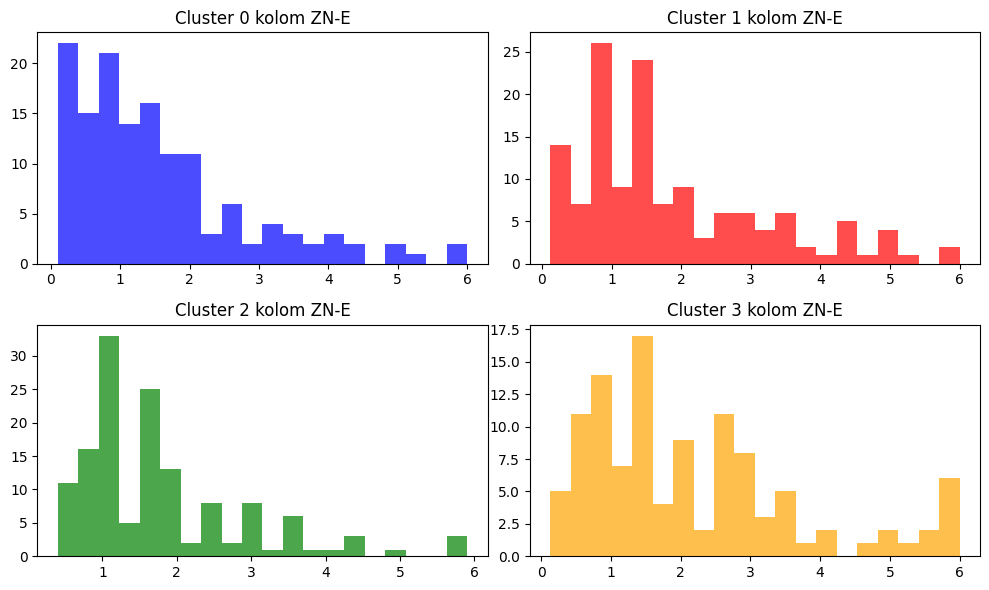

In [ ]:
import matplotlib.pyplot as plt

# Misalkan cluster_0, cluster_1, cluster_2, cluster_3 adalah DataFrame masing-masing klaster

# Plot histogram untuk kolom tertentu pada masing-masing klaster
kolom = 'ZN-E'  # Ganti 'nama_kolom' dengan nama kolom yang ingin Anda visualisasikan

plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.hist(cluster_0[kolom], bins=20, color='blue', alpha=0.7)
plt.title('Cluster 0 kolom ZN-E')

plt.subplot(2, 2, 2)
plt.hist(cluster_1[kolom], bins=20, color='red', alpha=0.7)
plt.title('Cluster 1 kolom ZN-E')

plt.subplot(2, 2, 3)
plt.hist(cluster_2[kolom], bins=20, color='green', alpha=0.7)
plt.title('Cluster 2 kolom ZN-E')

plt.subplot(2, 2, 4)
plt.hist(cluster_3[kolom], bins=20, color='orange', alpha=0.7)
plt.title('Cluster 3 kolom ZN-E')

plt.tight_layout()
plt.show()
